### Summary


In this project data modeling is the main goal. Models trying to explorethe connection between an response and a predictor variables. The models used here are regression models.These are the teacher evaluation and the Boston house pricing data set. Question asked are for example if "age" can support the prediction of their teacher evaluation scores, or the prediction of the house price base on size and condition. Two data sets are used for this purpose. On the way different cleaning techniques are applied and helper functions written. Also the train-test-working flow is applied to increase accuracy, validity and repeatability.

### Install and call packages

In [1]:
install.packages("tidyverse", repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\RtmpYvqPBM\downloaded_packages


In [2]:
# Which packages were installed
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.5.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'forcats' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
tidyverse_packages()

[1] "broom"       "cli"         "crayon"      "dplyr"       "dbplyr"     
 [6] "forcats"     "ggplot2"     "haven"       "hms"         "httr"       
[11] "jsonlite"    "lubridate"   "magrittr"    "modelr"      "purrr"      
[16] "readr"       "readxl\n(>=" "reprex"      "rlang"       "rstudioapi" 
[21] "rvest"       "stringr"     "tibble"      "tidyr"       "xml2"       
[26] "tidyverse"

In [4]:
install.packages("moderndive", repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'moderndive' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\RtmpYvqPBM\downloaded_packages


In [5]:
# Description
# Datasets and wrapper functions for tidyverse-friendly introductory linear regression, used in ModernDive:
# An Introduction to Statistical and Data Sciences via R available at <http://moderndive.com/> 
# https://cran.r-project.org/web/packages/moderndive/moderndive.pdf

library(moderndive)

Warning message:
"package 'moderndive' was built under R version 3.5.3"

### Teacher Evaluations dataset (evals)

<p>
The data are gathered from end of semester student evaluations for a large sample of professors
from the University of Texas at Austin. In addition, six students rate the 
professors' physical appearance. The result is a data frame where each row contains a different course 
and each column has information on either the course or the professor.
The data are gathered from end of semester student evaluations for a large sample of professors 
from the University of Texas at Austin. In addition, six students rate the professors' physical appearance. 
The result is a data frame where each row contains a different course and each column has information 
on either the course or the professor.
</p>

####  Looking at the whole data

In [6]:
# dataset: evals
# The data are gathered from end of semester student evaluations for a large sample of professors from
# the University of Texas at Austin. In addition, six students rate the professors’ physical appearance.
# The result is a data frame where each row contains a different course and each column has information 
# on either the course or the professor
# https://www.openintro.org/stat/data/?data=evals

glimpse(evals)

Observations: 463
Variables: 13
$ ID           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
$ score        <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8,...
$ age          <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 40...
$ bty_avg      <dbl> 5.000, 5.000, 5.000, 5.000, 3.000, 3.000, 3.000, 3.333...
$ gender       <fct> female, female, female, female, male, male, male, male...
$ ethnicity    <fct> minority, minority, minority, minority, not minority, ...
$ language     <fct> english, english, english, english, english, english, ...
$ rank         <fct> tenure track, tenure track, tenure track, tenure track...
$ pic_outfit   <fct> not formal, not formal, not formal, not formal, not fo...
$ pic_color    <fct> color, color, color, color, color, color, color, color...
$ cls_did_eval <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, 1...
$ cls_students <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 20...
$ cls_level    <fct>

In [7]:
head(evals)

ID,score,age,bty_avg,gender,ethnicity,language,rank,pic_outfit,pic_color,cls_did_eval,cls_students,cls_level
1,4.7,36,5,female,minority,english,tenure track,not formal,color,24,43,upper
2,4.1,36,5,female,minority,english,tenure track,not formal,color,86,125,upper
3,3.9,36,5,female,minority,english,tenure track,not formal,color,76,125,upper
4,4.8,36,5,female,minority,english,tenure track,not formal,color,77,123,upper
5,4.6,59,3,male,not minority,english,tenured,not formal,color,17,20,upper
6,4.3,59,3,male,not minority,english,tenured,not formal,color,35,40,upper


In [8]:
tail(evals)

ID,score,age,bty_avg,gender,ethnicity,language,rank,pic_outfit,pic_color,cls_did_eval,cls_students,cls_level
458,4.1,32,6.833,male,not minority,english,tenure track,not formal,color,9,21,lower
459,4.5,32,6.833,male,not minority,english,tenure track,not formal,color,52,86,upper
460,3.5,42,5.333,female,minority,non-english,tenure track,not formal,color,48,84,upper
461,4.4,42,5.333,female,minority,non-english,tenure track,not formal,color,52,67,upper
462,4.4,42,5.333,female,minority,non-english,tenure track,not formal,color,54,66,upper
463,4.1,42,5.333,female,minority,non-english,tenure track,not formal,color,28,35,lower


In [9]:
nrow(evals)
ncol(evals)
dim(evals)

[1] 463

[1] 13

[1] 463  13

In [10]:
names(evals)
length(names(evals))

[1] "ID"           "score"        "age"          "bty_avg"      "gender"      
 [6] "ethnicity"    "language"     "rank"         "pic_outfit"   "pic_color"   
[11] "cls_did_eval" "cls_students" "cls_level"

[1] 13

In [11]:
summary(evals)

       ID            score            age           bty_avg         gender   
 Min.   :  1.0   Min.   :2.300   Min.   :29.00   Min.   :1.667   female:195  
 1st Qu.:116.5   1st Qu.:3.800   1st Qu.:42.00   1st Qu.:3.167   male  :268  
 Median :232.0   Median :4.300   Median :48.00   Median :4.333               
 Mean   :232.0   Mean   :4.175   Mean   :48.37   Mean   :4.418               
 3rd Qu.:347.5   3rd Qu.:4.600   3rd Qu.:57.00   3rd Qu.:5.500               
 Max.   :463.0   Max.   :5.000   Max.   :73.00   Max.   :8.167               
        ethnicity          language             rank          pic_outfit 
 minority    : 64   english    :435   teaching    :102   formal    : 77  
 not minority:399   non-english: 28   tenure track:108   not formal:386  
                                      tenured     :253                   
                                                                         
                                                                         
          

In [12]:
class(evals)

[1] "tbl_df"     "tbl"        "data.frame"

In [13]:
# None missing values are occuring
sum(is.na(evals))

[1] 0

#### Univariate EDA - Looking at the teaching score variable

In [14]:
unique(evals$score)
str(evals$score)
class(evals$score)
dim(evals$score)
summary(evals$score)
frequencies <- count(evals, score)
frequencies[1:5,1:2]
table(evals$score)

[1] 4.7 4.1 3.9 4.8 4.6 4.3 2.8 3.4 4.5 3.8 4.9 4.4 4.2 3.5 2.5 4.0 5.0 3.6 3.7
[20] 2.9 3.3 3.2 2.3 3.0 3.1 2.7 2.4

 num [1:463] 4.7 4.1 3.9 4.8 4.6 4.3 2.8 4.1 3.4 4.5 ...


[1] "numeric"

NULL

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.300   3.800   4.300   4.175   4.600   5.000 

score,n
2.3,1
2.4,1
2.5,2
2.7,2
2.8,3



2.3 2.4 2.5 2.7 2.8 2.9   3 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9   4 4.1 4.2 4.3 
  1   1   2   2   3   2   5   6   4  11  11  17  20  19  19  26  24  28  22  26 
4.4 4.5 4.6 4.7 4.8 4.9   5 
 43  41  34  25  35  25  11 

#### Visualize data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


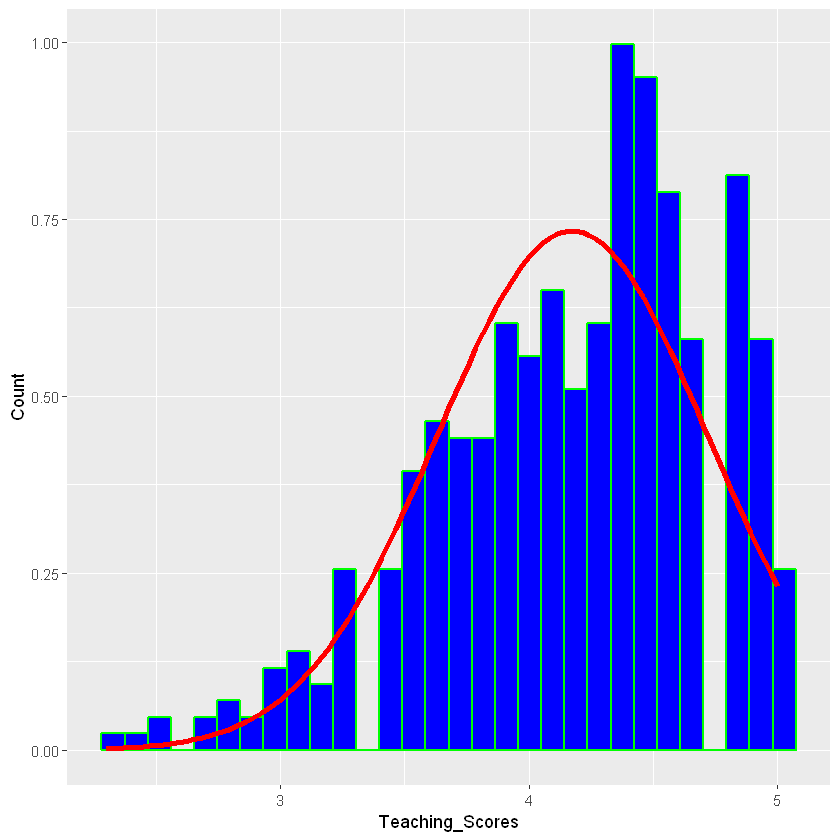

In [15]:
# Average professor evaluation score: (1) very unsatisfactory - (5) excellent.
evals %>%
ggplot(aes(x=score)) +
geom_histogram(color="green", size=0.8, fill="blue", aes(y =..density..)) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(evals$score), sd = sd(evals$score)), color="red", size=1.5)

# This stat makes it easy to superimpose a function on top of an existing plot. 
# The function is called with a grid of evenly spaced values along the x axis, and the results are drawn 
# (by default) with a line.
# https://www.rdocumentation.org/packages/ggplot2/versions/3.1.0/topics/stat_function



#### Data transformation of teaching scores

<p>
Data transformation changes a variable with the output of a function of that variable.
For example the logarithm of basis 10 is a function used for changing the variable.
As this is done over all values of a variable the distribution of that variable is changed.
Making the distribution more normal is one major goal of data transformation,
because(predictive) modeling fits better with distribution similar to the normal distribution.
Having a normal distribution reduces skewness, make better linear relationships, allows for 
additive relationships or make spreads more equal.
All this will hopefully in better predictions or increase model performance.
</p>
<p>
More information on <a href= "http://fmwww.bc.edu/repec/bocode/t/transint.html">
Transformations</a> here.
</p>

In [16]:
frequency_table_score <- count(evals, score)
glimpse(frequency_table_score)
frequency_table_score_max<-max(frequency_table_score)
frequency_table_score_max
frequency_table_score[19:23,1:2]
which(frequency_table_score==frequency_table_score_max,  arr.ind = TRUE)


Observations: 27
Variables: 2
$ score <dbl> 2.3, 2.4, 2.5, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3...
$ n     <int> 1, 1, 2, 2, 3, 2, 5, 6, 4, 11, 11, 17, 20, 19, 19, 26, 24, 28...


[1] 43

score,n
4.2,22
4.3,26
4.4,43
4.5,41
4.6,34


row,col
21,2


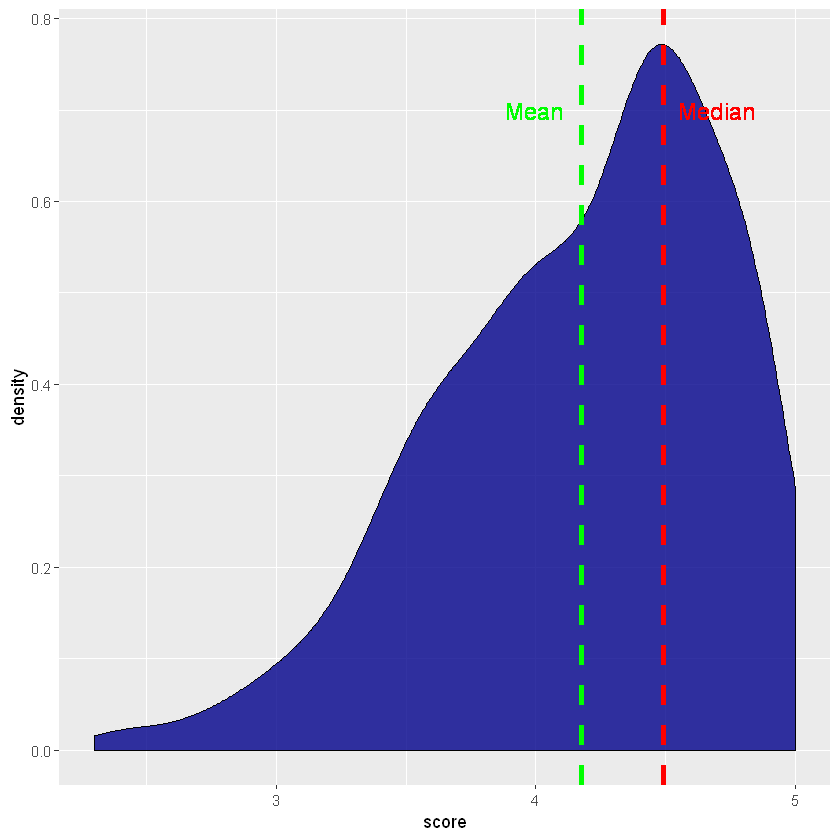

In [17]:
density_score <- density(evals$score)
ggplot(evals, aes(x=score)) +
geom_density(fill="darkblue", alpha=0.8)+
geom_vline(xintercept=4.5-0.01, linetype="dashed", size=1.5, color="red")+
geom_text(aes(x=4.7, label="Median", y=0.7), size=5, colour="red")+
geom_vline(xintercept=4.175, linetype="dashed", size=1.5, color="green")+
geom_text(aes(x=4.0, label="Mean", y=0.7), size=5, colour="green")





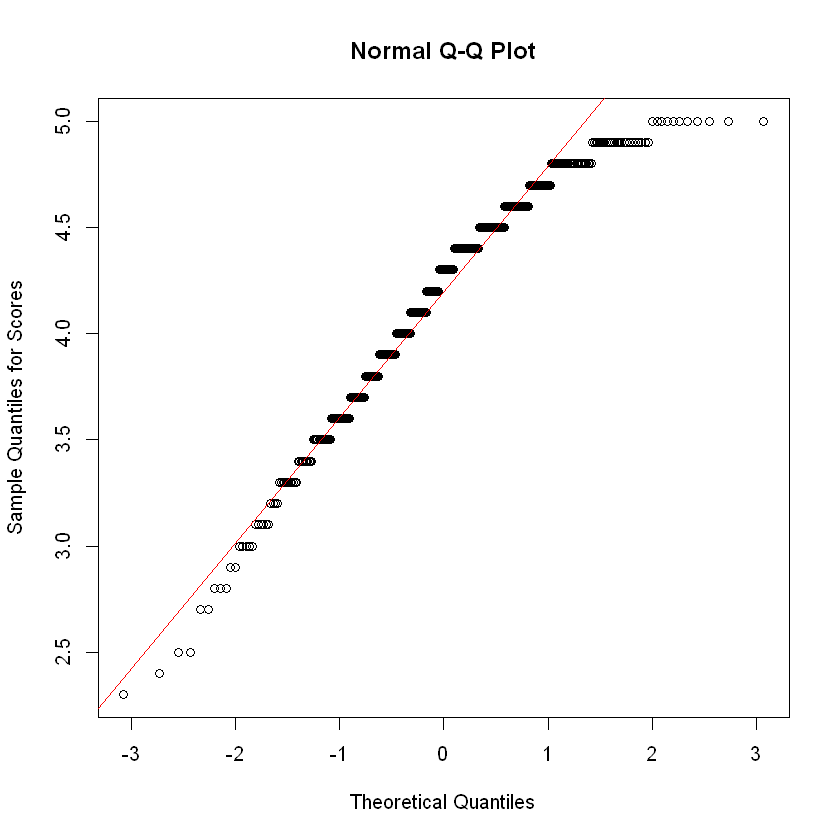

In [18]:
# Assesment of normality with quantile-quantile plot
qqnorm(evals$score,
       ylab="Sample Quantiles for Scores")
qqline(evals$score,
       col="red")

### Picking up the optimal number of bins with the Freedman_Diaconis rule

[1] "Freedman Diaconis rule for teaching scores version 1:  14"

[1] "Freedman Diaconis rule for teaching scores version 1:  13.0548167044157"

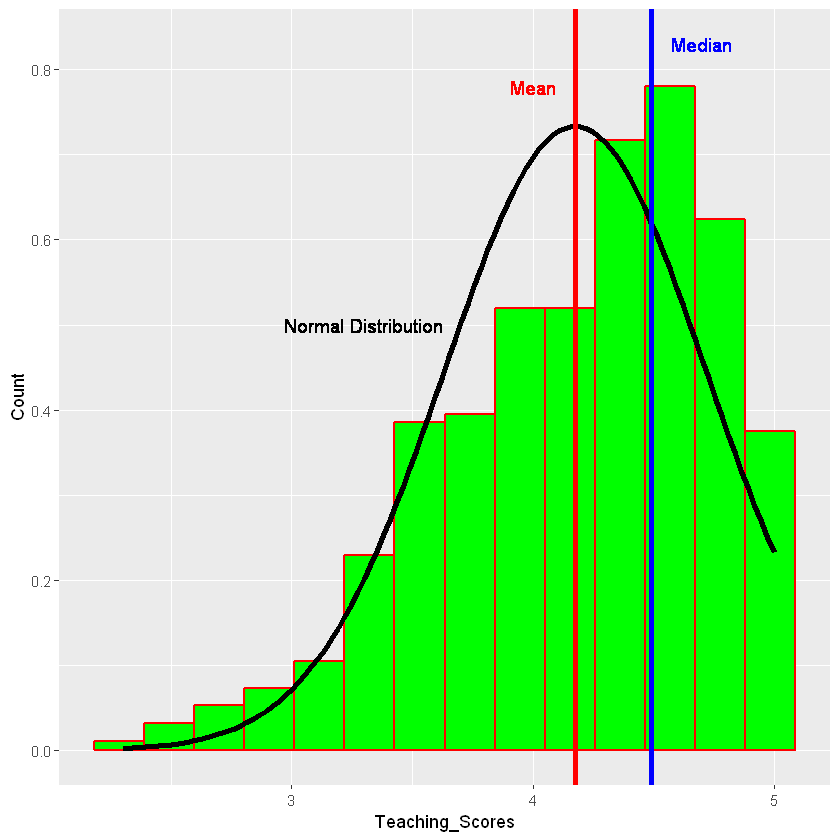

In [19]:
# If you use too few bins, the histogram doesn't really portray the data very well. 
# If you have too many bins, you get a broken comb look, which also doesn't give a sense of the distribution.
# https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram#862
# applying the Freedman-Diaconis for finding optimal number of bins
# In statistics, the Freedman–Diaconis rule can be used to select the size of the bins to be used in a histogram.
# https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

Freedman_Diaconis <- function (x) 
{
    h <- stats::IQR(x)
    if (h == 0) 
        h <- stats::mad(x, constant = 2)
    if (h > 0) 
        ceiling(diff(range(x))/(2 * h * length(x)^(-1/3)))
    else 1L
}
        
number_of_bins_score_1 <- Freedman_Diaconis(evals$score)
paste("Freedman Diaconis rule for teaching scores version 1: ", number_of_bins_score_1)

x_score =evals$score

number_of_bins_score_2 <- diff(range(x_score)) / (2 * IQR(x_score) / length(x_score)^(1/3))
paste("Freedman Diaconis rule for teaching scores version 1: ", number_of_bins_score_2)

evals %>%
ggplot(aes(x=score)) +
geom_histogram(color="red", size=0.8, fill="green", bins = number_of_bins_score_1, aes(y =..density..) ) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(evals$score), sd = sd(evals$score)), color="black", size=1.5)+
geom_text(aes(x=3.3, label="Normal Distribution", y=0.5), colour="black", angle=0, size=4)+
geom_vline(xintercept=4.5-0.01, linetype="solid", size=1.5, color="blue")+
geom_text(aes(x=4.7, label="Median", y=0.83), colour="blue", angle=0, size=4)+
geom_vline(xintercept=4.175, linetype="solid", size=1.5, color="red")+
geom_text(aes(x=4.0, label="Mean", y=0.78), size=4, colour="red")
        
# distribution is left-skewed
# tail on the left
# mode > median > mean
# Transformations?
# https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
# https://stats.stackexchange.com/questions/88218/transforming-extremely-skewed-distributions
# https://www.isixsigma.com/tools-templates/normality/tips-recognizing-and-transforming-non-normal-data/

#### Trying out normalizing the data with different transformations

<p>
http://rcompanion.org/handbook/I_12.html
</p>

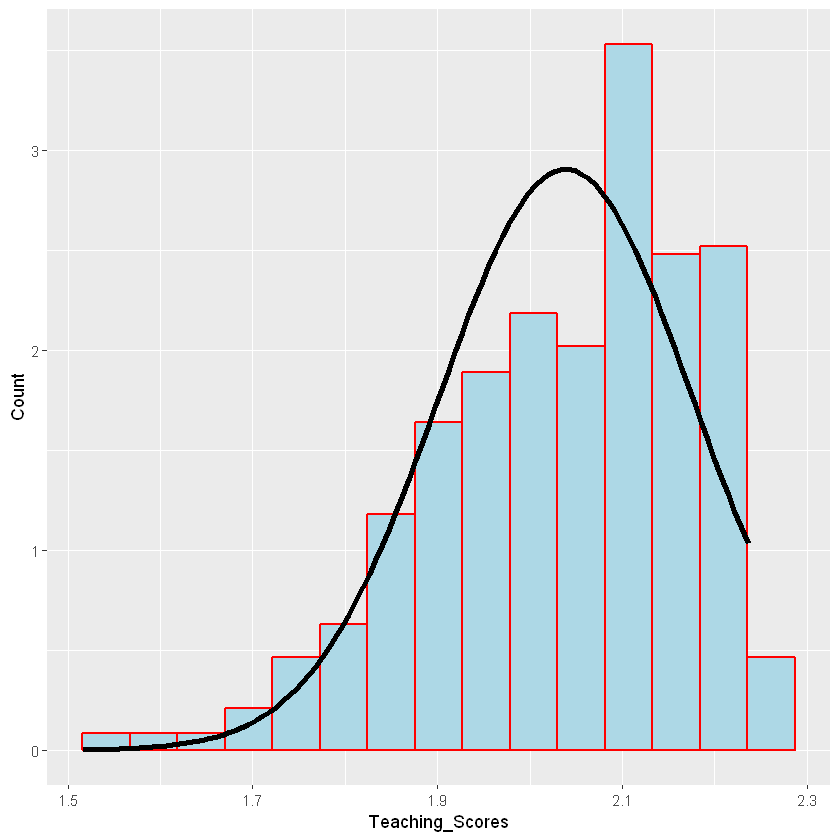

In [20]:
# square root transformation
number_of_bins_score_sqrt <- Freedman_Diaconis(sqrt(evals$score))
x_score_sqrt = sqrt(evals$score)
evals %>%
ggplot(aes(x=sqrt(score))) +
geom_histogram(color="red", size=0.8, fill="lightblue", bins = number_of_bins_score_sqrt, aes(y =..density..)  ) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(x_score_sqrt), sd = sd(x_score_sqrt)), color="black", size=1.5)

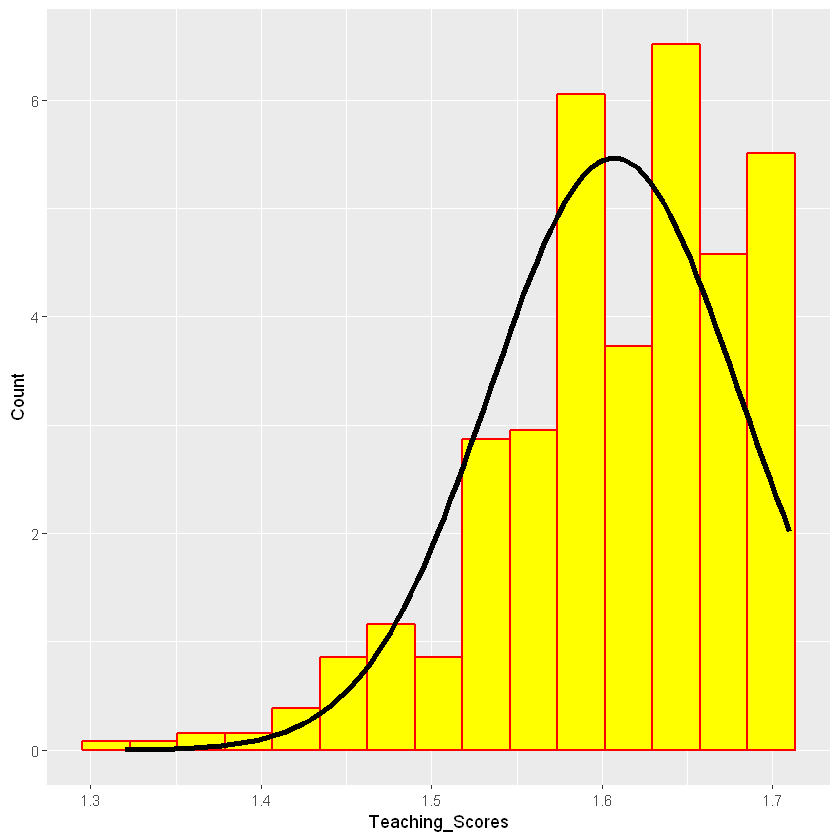

In [21]:

score_cube <- sign(evals$score) * abs(evals$score)^(1/3)

number_of_bins_score_sqrt <- Freedman_Diaconis(score_cube)

evals %>%
ggplot(aes(x=score_cube)) +
geom_histogram(color="red", size=0.8, fill="yellow", bins = number_of_bins_score_sqrt, aes(y=..density..)  ) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(score_cube), sd = sd(score_cube)), color="black", size=1.5)

 

In [22]:
# Square root transformation
# Cube root t = x^(1/3)
# Reverse the square cube transformation
# the undoing of a log transformation is done with the reverse of 10^x
# cube x = t^3
# score_cube <- sign(evals$score) * abs(evals$score)^(1/3)
# More information: http://fmwww.bc.edu/repec/bocode/t/transint.html

square_cube_inverse <- score_cube^3

cube_comparisons <- 
data.frame("Primary"=evals$score, "Cube Transformed"=score_cube, "Reversed"=square_cube_inverse)

head(cube_comparisons)



Primary,Cube.Transformed,Reversed
4.7,1.675069,4.7
4.1,1.600521,4.1
3.9,1.574061,3.9
4.8,1.686865,4.8
4.6,1.663103,4.6
4.3,1.626133,4.3


[1] "ID"                    "score"                 "age"                  
 [4] "bty_avg"               "gender"                "ethnicity"            
 [7] "language"              "rank"                  "pic_outfit"           
[10] "pic_color"             "cls_did_eval"          "cls_students"         
[13] "cls_level"             "LogTransformed_Scores"

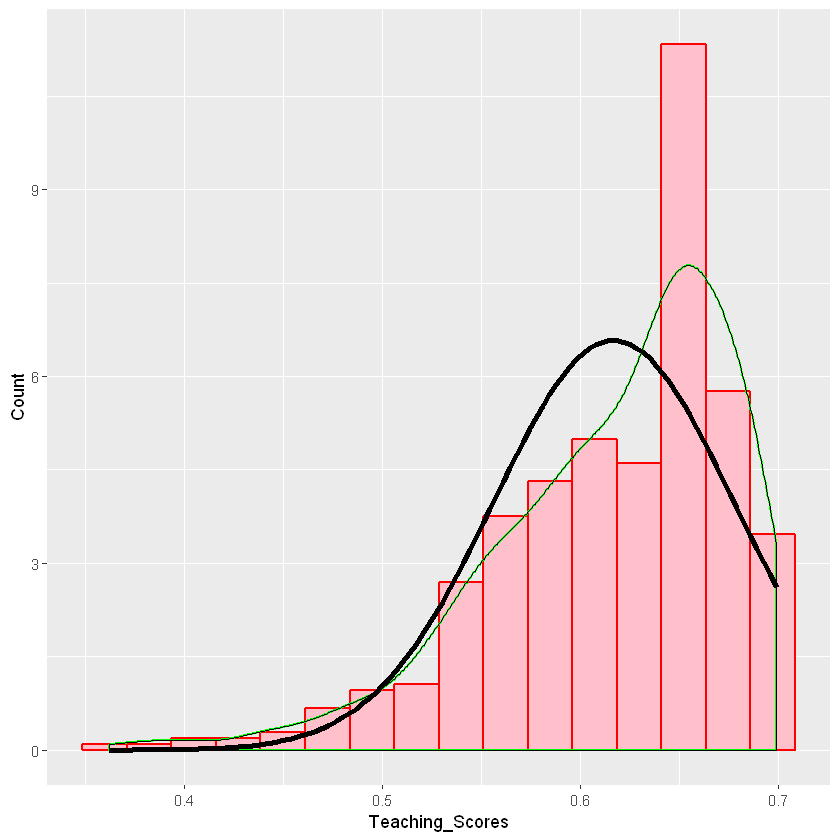

In [23]:
score_log <- log10(evals$score)
number_of_bins_score_log <- Freedman_Diaconis(score_log)



evals_LogTransformed_Scores <- 
evals %>% mutate(LogTransformed_Scores=score_log)
names(evals_LogTransformed_Scores )

LogTransformed_Scores_vector <- 
evals_LogTransformed_Scores$LogTransformed_Scores

evals_LogTransformed_Scores %>%
ggplot(aes(x=LogTransformed_Scores)) +
geom_histogram(color="red", size=0.8, fill="pink", bins = number_of_bins_score_log, aes(y=..density..) ) +
geom_density(color="green", size=0.8)+
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(LogTransformed_Scores_vector), sd = sd(LogTransformed_Scores_vector)),
              color="black", size=1.5)+ geom_density()




In [24]:
# Reverse the log transformation
# the undoing of a log transformation is done with the reverse of 10^x
score_log_undone <- 10^(score_log)


compare_score_logs <- data.frame("Logarithms of score by basis 10"= score_log, 
                                 "Logarithms reversed by exponentiation"= score_log_undone,
                                "Original values"= evals$score)

head(compare_score_logs)

Logarithms.of.score.by.basis.10,Logarithms.reversed.by.exponentiation,Original.values
0.6720979,4.7,4.7
0.6127839,4.1,4.1
0.5910646,3.9,3.9
0.6812412,4.8,4.8
0.6627578,4.6,4.6
0.6334685,4.3,4.3


In [25]:
library(utils)


install.packages("rcompanion", repos='http://cran.us.r-project.org', dependencies=TRUE)



Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'rcompanion' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\RtmpYvqPBM\downloaded_packages


In [26]:
install.packages('mvtnorm', repos='http://cran.us.r-project.org', dependencies=TRUE)

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'mvtnorm' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mvtnorm'"


The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\RtmpYvqPBM\downloaded_packages


#### Power transform
<p>
In statistics, a power transform is a family of functions that are applied to create 
a monotonic transformation of data using power functions. This is a useful data transformation technique 
used to stabilize variance, make the data more normal distribution-like, improve the validity of measures of association such as the Pearson correlation between variables and for 
other data stabilization procedures. 
</p>
<a href="https://en.wikipedia.org/wiki/Power_transform",  target="_blank">Wikipedia</p>

In [27]:
# Tukey’s Ladder of Powers transformation


library("rcompanion")
library(MASS)
score_T_tuk_score = transformTukey(evals$score, plotit=FALSE)
score_T_tuk_score[1:10]


number_of_bins_score_log <- Freedman_Diaconis(score_T_tuk_score)
number_of_bins_score_log

evals %>%
ggplot(aes(x=score_T_tuk_score)) +
geom_histogram(color="black", size=0.8, fill="lightgreen", bins = number_of_bins_score_log, aes(y=..density..) ) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(score_T_tuk_score), sd = sd(score_T_tuk_score)), color="black", size=1.5)

Warning message:
"package 'rcompanion' was built under R version 3.5.3"

ERROR: Error: package or namespace load failed for 'rcompanion' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'mvtnorm'


In [ ]:
Box = boxcox(evals$score ~ 1,            
             lambda = seq(-6,6,0.1)      # Try values -6 to 6 by 0.1
             )

In [ ]:
Cox = data.frame(Box$x, Box$y) 
# Order the new data frame by decreasing y
Cox2 = Cox[with(Cox, order(-Cox$Box.y)),]
#    log likelihood
Cox2[1,] 
# Extract that lambda
lambda = Cox2[1, "Box.x"]   
 # Transform the original data
Score_box = (evals$score^ lambda - 1)/lambda  
Score_box[1:5]

In [ ]:
evals_Cox <-
evals %>% mutate(Score_box=Score_box)


evals_Cox %>%
ggplot(aes(x=Score_box)) +
geom_histogram(color="black", size=0.8, fill="brown", bins = number_of_bins_score_log, aes(y=..density..) ) +
labs(x="Teaching_Scores", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(Score_box), sd = sd(Score_box)), color="black", size=1.5)

#### Compute summary statistics of teaching scores

In [ ]:

evals %>%
summarize(mean_score=mean(score),
          median_score=median(score),
          standard_deviation_score=sd(score),
          maximum=max(score),
          minimum=min(score))

#### Univariate EDA of the age variable

In [ ]:
#  Look at the data age of professor

glimpse(evals$age)
unique(evals$age)
class(evals$age)
table(evals$age)

In [ ]:
# Age of professor
unique(evals$age)
number_of_bins_score_age <- Freedman_Diaconis(evals$age)
paste("Freedman Diaconis rule for teaching scores version 1: ", number_of_bins_score_age)
length_age <- length(evals$age)
length_age
evals %>%
ggplot(aes(x=age)) +
geom_histogram(color="red", size=0.8, fill="gold", bins = number_of_bins_score_age, aes(y=..density..) ) +
labs(x="Age", y="Count")+
stat_function(fun=dnorm, args=list(mean=mean(evals$age), sd=sd(evals$age)), color="black", size=1.5)


In [ ]:
# Summary statistics

evals %>%
summarize(mean_score=mean(age),
          median_score=median(age),
          standard_deviation_score=sd(age),
          maximum=max(age),
          minimum=min(age))

#### Bivariate EDA of the relationship between age and teaching scores

In [ ]:
ggplot(evals, aes(x=age, y=score)) +
geom_point(color="violet", alpha=0.5, na.rm=TRUE)+
labs(x="Age", y="Teaching Scores", title="Age over teaching scores")
# Is there a relationship between age and teaching scores?
# No, the data points are evenly distributed

In [ ]:
# Overplotting?
ggplot(evals, aes(x=age, y=score)) +
geom_jitter(color="violet", alpha=0.5, na.rm=TRUE)+
labs(x="Age", y="Teaching Scores", title="Age over teaching scores with geom_jitter")
# Is there a relationship between age and teaching scores?
# No, it seems the data points are evenly distributed

In [ ]:
evals %>% summarize(Correlation_age_scores=cor(age, score))
# the relationship between age and teaching scores is very weakly negative
# the older the lower the teaching scores

In [ ]:
# visualizing the relationship age and teach scores with a regression line
# x: age - independent variable
# y: score - dependent variable

plot_age_score_reg <- 
evals %>% ggplot(aes(x=age,y=score))+
geom_jitter(alpha=0.6, width=0.3, color="green")+
geom_smooth(method="lm", se=FALSE, color="red", size=1)+
labs(x="Age - independent variable", y="Teaching score - dependent variable")

plot_age_score_reg 

In [ ]:
# simple linear regression model of the bivariate relationship between age and scores

reg_score_age <- 
lm(score~age, data=evals)

reg_score_age
summary(reg_score_age)

# When age is 0 the beauty score is 4.461932
# (given all other variables are not changing)
# Meaning every teacher has on average a beauty score of 4.461932 independent of the age
# for every unit of age (month) teaching scores decrease by -0.005938
# 0-hypothesis: a relationship between teaching score and age exists not
# Alternative hypothesis: a relationship between teaching score and age exists
# Given a significant level of 0.05 and a p-value below of 0.0213
# age influences the teaching scores
# The 0-hypothesis is rejected, and the alternative hypothesis is not rejected
# the slope of age is with -0.005938 slightly negative
# Assumption: as age increases scores decrease

In [ ]:
# using get_regression_table from moderndive instead of summary
get_regression_table(reg_score_age)

#### Building regression models and using metrics (rmse, RSS and R-squared) for model assesment

In [ ]:
# regression model: reg_score_age
# predict teaching score with the model
# model: independent variable is age, dependent variable is teaching score
# building a linear regression models means finding the explanatory and response variables

pred_score_age <-
predict(reg_score_age)

# Residual = Observed value - Predicted value 
df_model_score_age <- 
data.frame(Actual_teaching_scores=evals$score, 
           Predicted_scores=pred_score_age
           )%>% 
mutate(Residuals=Actual_teaching_scores-Predicted_scores)


head(df_model_score_age)
glimpse(df_model_score_age)

# Creating a similar table with get_regression
head(get_regression_points(reg_score_age))


In [ ]:

# Model assesment

rmse_scores_age <- 
rmse(df_model_score_age$Actual_teaching_scores, df_model_score_age$Predicted_scores )

paste("Root Mean Square Error (of the simple linear regression model predicting teaching scores with age): ", 
      round(rmse_scores_age, 2))


# Interpretation: on average every prediction of a teaching score has a difference of 0.54 teaching scores
# from the actual teaching score.



# Sum of residuals squared

RSS_reg_score_age <-
get_regression_points(reg_score_age)  %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))

paste("RSS: ", RSS_reg_score_age)



R_squared_reg_model_price_yr_calculated <- 1- RSS_reg_model_price_yr_sf / TSS_squared_reg_model_price_yr 

# TSS_squared_reg_model_price_yr <-  sum((housesales_none_33$log10_prices - mean(housesales_none_33$log10_prices))^2)
TSS_evals_scores <- sum((evals$score  - mean(evals$score ))^2)

R_squared_evals_scores_age <-
1- RSS_reg_score_age / TSS_evals_scores

paste("R-squared_adjusted_extracted: ", summary(reg_score_age)$adj.r.squared)
paste("R-squared_calculated: ", R_squared_evals_scores_age)

summary(reg_score_age)


#### Writing two functions calculating RSS and R-squared

In [ ]:
# Calculating two functions


# Writing a function calculating the Residual Sum of Square

    
RSS_calc_fun <-  function(regression_model) {
    
    
    RSS <- get_regression_points(regression_model)  %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))
    # Sum of residuals squared
    RSS <- as.numeric(RSS)
    return(RSS)

} 

RSS_reg_score_age_fun <- 
RSS_calc_fun(regression_model=reg_score_age)
class(RSS_reg_score_age_fun)
RSS_reg_score_age_fun 


paste("RSS: ", RSS_calc_fun(regression_model=reg_score_age))

# Writing a function calculating the R-squared

R_squared_calc <- function(regression_model, dependent_variable){
    
    RSS <- get_regression_points(regression_model)  %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))
    
    RSS <- as.numeric(RSS)
    # Total sum of square
    Deviation_Mean <- (dependent_variable - mean(dependent_variable))^2
    TSS <- sum(Deviation_Mean)
    
    R_squared <- 1- RSS / TSS
    
    return(R_squared)
}

R_squared_reg_score_age <-
R_squared_calc(regression_model=reg_score_age, dependent_variable=evals$score)

paste("R-Squared: ", R_squared_reg_score_age)

In [ ]:
reg_model_score_bty <- lm(score~bty_avg, data=evals)
get_regression_table(reg_model_score_bty)

# predict values with equation
# bty_average = 4
pred_bty_average_4 = 3.880 + 0.067*4
pred_bty_average_4

# predict values with equation over byt_avg column
get_regression_points(reg_model_score_bty ) %>%
mutate(score_hat_2 = 3.88 + 0.067 * bty_avg) %>%
head()

pred_reg_model_score_bty  <-  predict(reg_model_score_bty)
rmse(evals$score,pred_reg_model_score_bty )

In [ ]:
# visualizing the relationship age and teach scores with a regression line
# x: age - independent variable
# y: score - dependent variable
# group by beauty scores

plot_age_score_reg_by_beauty <- 
evals %>% ggplot(aes(x=age,y=score, color=bty_avg))+
geom_jitter(alpha=0.6, width=0.3)+
geom_smooth(method="lm", se=FALSE, color="red", size=1.5)+
scale_color_gradient( low = "red", high = "yellow")

plot_age_score_reg_by_beauty

In [ ]:
reg_score_age_beauty <- 
lm(score ~ age + bty_avg, data=evals)

reg_score_age_beauty
get_regression_table(reg_score_age_beauty)
summary(reg_score_age_beauty)

# forr every increase in unit of beauty average teaching scores are increasing by 0.060656
# given all other variables are not changing
# 0-hypothesis: a relationship between teaching score and age exists not
# 0-hypothesis: a relationship between teaching score and beauty score exists not
# Alternative hypothesis: a relationship between teaching score and age exists
# Alternative hypothesis: a relationship between teaching score and beauty score exists
# Given a significant level of 0.05 and a p-value below of 0.251396 age influences the teaching scores
# Given a significant level of 0.05 and a p-value below of  0.000429 beauty average influences the teaching scores
# The 0-hypothesis is rejected, and the alternative hypothesis is not rejected

# Are interaction effects ocurring?

In [ ]:
# model: reg_score_age_beauty

pred_model_reg_score_age_beauty <-
predict(reg_score_age_beauty)

df_pred_model_reg_score_age_beauty <- 
data.frame(Actual_values=evals$score,  Predictions= pred_model_reg_score_age_beauty ) %>%
mutate(Residuals = Actual_values-Predictions )

head(df_pred_model_reg_score_age_beauty)

# Creating a similar table with get_regression
head(get_regression_points(reg_score_age))

rmse_pred_model_reg_score_age_beauty <- 
rmse(df_pred_model_reg_score_age_beauty$Actual_values, df_pred_model_reg_score_age_beauty$Predictions)


paste("Root Mean Square Error of the simple linear regression model predicting teaching scores with age and beauty: ", 
      round(rmse_pred_model_reg_score_age_beauty, 2))

# Conclusion: this model delivers an improved rmse of 0.53
# 0.1 better than the model only based on age


In [ ]:
# Making predictions with new data

reg_score_age_beauty <- 
lm(score ~ age + bty_avg, data=evals)

evals %>% summarize(Minbty_avgimum_age = min(age),
                    Maximum_age=max(age))

evals %>% summarize(Minimum_bty_avg = min(bty_avg),
                    Maximum_bty_avg=max(bty_avg))

# Generate random data within the boundaries given by observed min and max
random_age <-
floor(runif(10, min=29, max=74))

random_beatuy <-
runif(10, min=1.6, max=8.2)

new_data_67563 <-
data_frame(age=random_age,
           bty_avg=random_beatuy)

dim(new_data_67563)


predict_age_beauty_nd <-
predict(reg_score_age_beauty, newdata=new_data_67563 )
length(predict_age_beauty_nd)

predict_age_beauty_nd_absolute <-
10^predict_age_beauty_nd 
length(predict_age_beauty_nd_absolute )

predict_age_beauty_nd_df <-
cbind(new_data_67563 , predict_age_beauty_nd, predict_age_beauty_nd_absolute)

predict_age_beauty_nd_df


In [ ]:
reg_score_age_beauty_interaction <- 
lm(score ~ age * bty_avg, data=evals)

get_regression_table(reg_score_age_beauty_interaction )
reg_score_age_beauty_interaction 
summary(reg_score_age_beauty_interaction )

# An interaction effect between beauty average and age exists
# Assumptions:
# A age increases beauty decreases and then teaching scores decrease
# While this is assumed, beauty average remains a variable with influence
# Conclusion: the interaction effect between beauty average and age should be
# included in the model, but also beauty average as an independent variable

In [ ]:
# reg_score_age_beauty_interaction

pred_reg_score_age_beauty_interaction <-
predict(reg_score_age_beauty_interaction)

df_model_reg_score_age_beauty_interaction <-
data.frame(Actual=evals$score, Predictions=pred_reg_score_age_beauty_interaction)%>%
mutate(Residuals=Actual-Predictions)

head(df_model_reg_score_age_beauty_interaction )
head(get_regression_points(reg_score_age_beauty_interaction))

rmse_df_model_reg_score_age_beauty_interaction <-
rmse(df_model_reg_score_age_beauty_interaction$Actual,
     df_model_reg_score_age_beauty_interaction$Predictions)

paste("Root Mean Square Error of the simple linear regression model predicting teaching scores with age and beauty considering interaction effects: ", 
      round(rmse_df_model_reg_score_age_beauty_interaction, 2))

# Considering interaction effects did not improve the model

#### Categorical variables like gender and rank as predictor variables

In [ ]:
# Investigating the relationship between gender and scores
# Boxplot score over gender

statistics_scores_by_gender <- 
evals %>% group_by(gender) %>% summarize(n=n(), 
                                         Proportions=n/length(evals$gender),
                                         Median=median(score), 
                                         Mean = mean(score),
                                         Quantile_25=quantile(score, probs=c(0.25)),
                                         Quantile_75=quantile(score, probs=c(0.75)),
                                         Standard_Deviation = sd(score),
                                         IQR=Quantile_75-Quantile_25
                                         )


evals %>% ggplot(aes(x=gender, y=score))+
geom_boxplot(color="red", size=1, fill=c("black","blue"))+
geom_text(x=1, y=4.25, label=paste("Median female: \n4.1 teaching scores" ), color="red")+
geom_text(x=2, y=4.45, label=paste("Median male: \n4.3 teaching scores" ), color="red")+
geom_text(x=0.7, y=3.5, label=paste("1.Quantile female: \n3.7" ), color="black")+
geom_text(x=0.7, y=4.7, label=paste("3.Quantile female: \n4.5" ), color="black")+
geom_text(x=2.3, y=3.7, label=paste("1.Quantile male: \n3.9" ), color="black")+
geom_text(x=2.3, y=4.8, label=paste("3.Quantile male: \n4.6" ), color="black")

statistics_scores_by_gender


glimpse(statistics_scores_by_gender)
class(statistics_scores_by_gender)
statistics_scores_by_gender[1, "Median"]
length(evals$gender)

# mean difference between male and female is the slope of the regression line of score by gender
# men teaching scores differ on average by 0.1415078 from women
# For every data point men scores are 0.1415078 higher than women scores
# In case of categorical variables the group means are the predictions.

mean_difference <- statistics_scores_by_gender[2, "Mean"] - statistics_scores_by_gender[1, "Mean"]
mean_difference 

In [ ]:
# Distributions of gender by female and male

evals %>% ggplot(aes(x=score))+geom_density(fill="gold", color="red")+facet_wrap(.~gender)

In [ ]:
# linear regression lines plotted by gender

plot_age_score_reg_by_gender_reg <-
evals %>% ggplot(aes(x=age,y=score, color=gender))+
geom_jitter(alpha=0.6, width=0.3)+
geom_smooth(method="lm", aes(color= gender ), se=FALSE)
plot_age_score_reg_by_gender_reg

# Interpretation: 
# it seems gender influences teaching scores
# teaching scores decreasing faster for females than males, when age increases

In [ ]:
# regression scores by gender

reg_model_sc_gen <-
lm(score~gender, evals)

get_regression_table(reg_model_sc_gen )

reg_model_sc_gen_points <- 
get_regression_points(reg_model_sc_gen )

head(reg_model_sc_gen_points)

rmse(evals$score, reg_model_sc_gen_points$residual)

# In case of categorical variables the group means are the predictions.
# The prediction for a female teaching score is in this model 4.093
# The predictions for male teachingscores are on average 0.142 higher

# Alternatively the Sum of squared residual is another measure to asses the quality of a regression model
# Residual_Sum_of_Squares = RSS
reg_model_sc_gen_points %>% mutate(Squared_residuals = residual^2) %>% 
summarize(Residual_Sum_of_Squares_RSS= sum(Squared_residuals ))

In [ ]:
# plot residuals

reg_model_sc_gen_points %>% 
ggplot(aes(x=residual)) +
geom_histogram(color="black", fill="gold")

In [ ]:
# teaching score by rank
statistics_scores_by_rank <- 
evals %>% group_by(rank) %>% summarize(n=n(), 
                                         Proportions=n/length(evals$rank),
                                         Median=median(score), 
                                         Mean = mean(score),
                                         Quantile_25=quantile(score, probs=c(0.25)),
                                         Quantile_75=quantile(score, probs=c(0.75)),
                                         Standard_Deviation = sd(score),
                                         IQR=Quantile_75-Quantile_25
                                         )
statistics_scores_by_rank

In [ ]:
# visualize teaching score by rank with boxplot

evals %>% ggplot(aes(x=rank, y=score))+
geom_boxplot(color="red", size=1, fill="blue")


In [ ]:
#linear regression
reg_model_sc_rank <- 
lm(score ~ rank, evals)
get_regression_table(reg_model_sc_rank)

# group means 

teaching_mean <-  4.284 
ranktenure_track_mean <-  4.284 - 0.130 
ranktenured <- 4.284 + 0.145

# In case of categorical variables the group means are the predictions.

input_1<- c(teaching_mean,ranktenure_track_mean, ranktenured )
dimnames_1 <- list(c("teaching_mean","ranktenure_track_mean", "ranktenured_mean"), "Scores")
matrix(input_1, ncol=1, nrow=3,   dimnames = dimnames_1)

In [ ]:
# plot residuals

get_regression_points(reg_model_sc_rank) %>% 
ggplot(aes(x=residual)) +
geom_histogram(color="black", fill="gold")

In [ ]:

reg_model_score_age_gender <-
lm(score ~ age + gender, data=evals)


get_regression_table(reg_model_score_age_gender )
summary(reg_model_score_age_gender )

# all variables are significant given a test level of 0.05 and p-values below
# if the gender is male for every unit in age teaching scores increase by 0.190571
# given all other variables do not change
# if the gender is female for every unit in age teaching scores decrease by -0.008678




In [ ]:
# reg_model_score_age_gender

pred_reg_model_score_age_gender <- 
predict(reg_model_score_age_gender)

head(get_regression_points(reg_model_score_age_gender))

rmse(evals$score, pred_reg_model_score_age_gender)

# adding gender did not result in better predictions

In [ ]:
# checking for interaction effects
reg_model_score_age_gender_inter <-
lm(score ~ age * gender, data=evals)
get_regression_table(reg_model_score_age_gender_inter )
summary(reg_model_score_age_gender_inter)

In [ ]:
# reg_model_score_age_gender_inter
pred_reg_model_score_age_gender_inter <-
predict(reg_model_score_age_gender_inter)
head(get_regression_points(reg_model_score_age_gender_inter))
round(rmse(evals$score, pred_reg_model_score_age_gender_inter), 2)
# Considering interaction effects resulted in only a very slight improvement

In [ ]:
install.packages("ggcorrplot",  repos = c("http://rstudio.org/_packages","http://cran.rstudio.com"))
library(ggcorrplot)

In [ ]:
# bty_avg - Average beauty rating of professor.
unique(evals$bty_avg)
number_of_bins_score_beauty <- Freedman_Diaconis(evals$bty_avg)
paste("Freedman Diaconis rule for teaching scores version 1: ", number_of_bins_score_age)

evals %>%
ggplot(aes(x=bty_avg)) +
geom_histogram(color="red", size=0.8, fill="darkgreen", bins = number_of_bins_score_beauty, aes(y=..density..) ) +
geom_density(color="orange", size=1)+
labs(x="Beauty", y="Count")+
stat_function(fun=dnorm, args=(list(mean=mean(evals$bty_avg), sd=sd(evals$bty_avg))), color="black", size=1.5)

density(evals$age)


# distribution is right-skewed
# tail on the right
# mean > median > mode

In [ ]:
# EDA of the relationship between teaching score and beauty score

evals %>% ggplot(aes(x=bty_avg, y=score, color=age)) + geom_jitter(alpha=0.5)+
labs(title="Beauty score over teaching score", x="Beauty score", y="Teaching score")+
scale_color_gradient( low = "red", high = "yellow")

In [ ]:
# regression line beauty score and teaching scores
ggplot(evals, aes(x = bty_avg, y = score)) +
  geom_point(color="brown") +
  labs(x = "beauty score", y = "score") +
  geom_smooth(method = 'lm', se = FALSE)

In [ ]:
# Fit a simple linear regression model
model_score_beauty <- lm(score ~ bty_avg, data = evals)

# Output regression table
get_regression_table(model_score_beauty )

# For every increase of one in beauty score, you should observe an 
# associated increase of on average 0.0670 units in teaching score.

In [ ]:
cor_beauty_score <- evals %>% summarize(Correlation_beauty_teachingscore=cor(bty_avg, score))
print(cor_beauty_score)
# both variables are weakly positively related

In [ ]:
# building a model with all variables as predictors
reg_model_all_pred_var <-
lm(score~., data=evals)

reg_model_all_pred_var
summary(reg_model_all_pred_var)
head(get_regression_table(reg_model_all_pred_var))
head(get_regression_points(reg_model_all_pred_var))



In [ ]:
# visualize residuals

get_regression_points(reg_model_all_pred_var) %>% 
ggplot(aes(x=residual)) +
geom_histogram(color="pink", fill="yellow", bins=20)+
labs(x="Count", y="Residuals", title="Residuals of model predicting teaching scores with all predictor variables" )

In [ ]:
# predicting with reg_model_all_pred_var

reg_model_all_pred_var_pred <- 
predict(reg_model_all_pred_var)

rmse(evals$score, reg_model_all_pred_var_pred )

# Incorporating all variables as predictor variables in the model resuls in an improved rmse
# Next: sort out variables with insignificant p-values

In [ ]:
# Feature engineering
str(evals)

In [ ]:
# Discard ID: ID  a predictor makes not sense
# age + gender + language + rank + pic_outfitnotformal + pic_color + cls_did_eval + cls_students   
# select only variables with a significant p-value below 0.05

reg_model_selected_variables <-
lm(score ~ age + gender + language + rank +  pic_outfit + 
   pic_color + cls_did_eval + cls_students, data=evals)

summary(reg_model_selected_variables)

reg_model_selected_variables_table <-
get_regression_table(reg_model_selected_variables)
reg_model_selected_variables_residuals <-
get_regression_points(reg_model_selected_variables)

reg_model_selected_variables_table

head(reg_model_selected_variables_residuals)

In [ ]:
reg_model_selected_variables_pred <-
predict(reg_model_selected_variables)

# Sum of squared residuals
get_regression_points(reg_model_selected_variables) %>% mutate(SR=residual^2) %>% summarize(SSR=sum(SR))

rmse(evals$score, reg_model_selected_variables_pred)

In [ ]:

# Model assesment of all developed models using RSS
# Writing a function finding RSS over many lm models
# Using a foor loop extracting RSS and model name

# Input lists




Reg_models <- list(reg_model_selected_variables, 
                   reg_model_all_pred_var,
                   model_score_beauty,
                   reg_model_score_age_gender,
                   reg_model_sc_rank,
                   reg_score_age_beauty_interaction,
                   reg_score_age_beauty,
                   reg_score_age)


Reg_models_names <- list("reg_model_selected_variables", 
                          "reg_model_all_pred_var",
                          "model_score_beauty",
                          "reg_model_score_age_gender",
                          "reg_model_sc_rank",
                          "reg_score_age_beauty_interaction",
                          "reg_score_age_beauty",
                          "reg_score_age")




RSS_finding_for_many_models <- 

function(regression_models, regression_model_names){
    
        RSS_vector <- c()
        RSS_reg_model_names <- c()
    
        for (i in 1:length(regression_models)) {
        

    
        RSS <- get_regression_points(regression_models[[i]]) %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))
        # Sum of residuals square
        # RSS <- as.numeric(RSS)
        # RSS_vector[i] <- RSS
        
        RSS_vector[i] <- RSS
        RSS_reg_model_names[i] <- regression_model_names[[i]]
        
        
        
    }
    
    mapped <- mapply(c, RSS_reg_model_names, RSS_vector )
    mapped <- mapped[, order(mapped[2,])]
    return(mapped)
}


RSS_finding_for_many_models(Reg_models, Reg_models_names)


# Conclusion:
# The model "reg_model_all_pred_var" - model using all predictor variables including ID has the lowest RSS
# This model delivers therefore according to RRS the best predictions.
# Lm with power transformed values could deliver better results.


In [ ]:

# Writing a function calculating the R-squared over all models
# R2 is a measure of model fit

R_squared_calc_over_many_models <- 
function(regression_models, R_squared_reg_model_names, dependent_variable){
    
    R_squared_vector <- c()
    R_squared_names_vector<- c()
    
    for (i in 1:length(regression_models)) {
    
    RSS <- get_regression_points(regression_models[[i]])  %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))
    
    RSS <- as.numeric(RSS)
    
    # Total sum of square
    
    Deviation_Mean <- (dependent_variable - mean(dependent_variable))^2
    TSS <- sum(Deviation_Mean)
    
    R_squared <- 1- RSS / TSS
    
    R_squared_vector[i] <- R_squared
    R_squared_names_vector[i] <- R_squared_reg_model_names[[i]]
    
    }
    
    mapped <- mapply(c, R_squared_names_vector, R_squared_vector)
    mapped <- mapped[, order(mapped[2,], decreasing = TRUE)]
    return(mapped)
    
}



R_squared_calc_over_many_models(regression_models=Reg_models, 
                                R_squared_reg_model_names=Reg_models_names, 
                                dependent_variable=evals$score)



# The model "reg_model_all_pred_var" has the highest r-squared with 0.163765841959724
# This supports the conclusion with the RSS
# However the R-squared is not very good.
# Transforming the variable can result in better predictions.



In [ ]:
# Writing a function calculating the rmse over all models
# rmse is a commonly used measure of preditive error.
# rmse can be thought of as the 'typical' error a predicive model will make.

rmse_calc_over_many_models <- 
function(regression_models, rmse_reg_model_names, response_variable){
    
    rmse_vector <- c()
    rmse_names_vector<- c()
    
    for (i in 1:length(regression_models)) {
        
        rmse_vector[i] <- rmse(response_variable, predict(regression_models[[i]]))
        rmse_names_vector[i] <- rmse_reg_model_names[[i]]
        
    
    
    }
    
    mapped <- mapply(c, rmse_names_vector, rmse_vector)
    mapped <- mapped[, order(mapped[2,], decreasing = FALSE)]
    return(mapped)
    
}



rmse_calc_over_many_models(regression_models=Reg_models, 
                           rmse_reg_model_names=Reg_models_names, 
                           response_variable=evals$score)


# The model "reg_model_all_pred_var" has the highest r-squared with 0.496810538127208
# Lower values of the rmse point to a better model fit
# This supports the conclusion with the RSS and R-squared
# Transforming the variable can result in better predictions.




In [ ]:
# Mean Square Error = Mean Square Residuals; Residuals = Errors = gap between observed values and predicted values

rmse_calc_over_many_models_alt <- 

function(regression_models, regression_model_names){
    
        rmse_vector <- c()
        rmse_reg_model_names <- c()
    
        for (i in 1:length(regression_models)) {
        

    
        rmse <- get_regression_points(regression_models[[i]]) %>% 
                mutate(RS=residual^2) %>% summarize(RSS=sqrt(mean(RS)))
        # Sum of residuals square
        # RSS <- as.numeric(RSS)
        # RSS_vector[i] <- RSS
        
        rmse_vector[i] <- rmse
        rmse_reg_model_names[i] <- regression_model_names[[i]]
        
        
        
    }
    
    mapped <- mapply(c, rmse_reg_model_names, rmse_vector )
    mapped <- mapped[, order(mapped[2,])]
    return(mapped)
}


rmse_calc_over_many_models_alt(Reg_models, Reg_models_names)


# This version of calculating rmse delivers the same result

In [ ]:
# Transforming all numerical variables of the data set evals with the logarithm to the basis 10
# Reduce skewness of the distribution, make better predictions with condensed and compact distributions

# Look at the data
# log10(evals$score)
# glimpse(evals)

evals_log_transformed <-                
evals %>% mutate(  log10_score =log10(score), log10_age =log10(age ), 
                    log10_bty_avg =log10(bty_avg), log10_cls_did_eval =log10(cls_did_eval),
                    log10_cls_students =log10(cls_students)) 

# glimpse(evals_log_transformed)

evals_log_transformed_select <- 
evals_log_transformed %>% dplyr :: select(ID, gender , ethnicity, language , rank , pic_outfit ,  pic_color, cls_level, 
                                         log10_score , log10_age, log10_bty_avg , log10_cls_did_eval, 
                                         log10_cls_students)
           
glimpse(evals_log_transformed_select)

In [ ]:
# Build a regression model with evals_log_transformed_select using log transformed numerical values

reg_model_evals_log_transformed_select_all_variables <-
lm(log10_score ~ ., data=evals_log_transformed_select)

get_regression_table(reg_model_evals_log_transformed_select_all_variables)
summary(reg_model_evals_log_transformed_select_all_variables)

In [ ]:
# Model assesement

RSS_log_transformed_select <-
RSS_calc_fun(reg_model_evals_log_transformed_select_all_variables)


R_squared_log_transformed_select <-
R_squared_calc(regression_model=reg_model_evals_log_transformed_select_all_variables, 
               dependent_variable=evals_log_transformed_select$log10_score)


rmse_evals_log_transformed_select <- 
rmse(evals_log_transformed_select$log10_score, predict(reg_model_evals_log_transformed_select_all_variables))



# RSS_finding_for_many_models(Reg_models_log_transformed, Reg_models_names_log_transformed)
# Does not work why?
# for (i in 1:length(reg_models)), reg_models is a specific list of models and not a variable
# Forrected: for (i in 1:length(regression_models))

Reg_models_evals_log_transformed <-
list(reg_model_evals_log_transformed_select_all_variables)

Reg_models_evals_log_transformed_names <-
list("reg_model_evals_log_transformed_select_all_variables")

RSS_evals_log_transformed_select <-
RSS_finding_for_many_models(Reg_models_evals_log_transformed , Reg_models_evals_log_transformed_names )

paste("RSS_log_transformed: ", RSS_evals_log_transformed_select)
paste("R_squared_log_transformed: ", R_squared_log_transformed_select)
paste("rmse_evals_log_transformed: ", rmse_evals_log_transformed_select)

# Conclusion:
# rmse_evals_log_transformed:  0.0556551904827319 compared with 0.496810538127208 of the  best not transformed model
# The data tranformation resulted in significant improvement in model performance or quality
# rmse is on the same scale as the response variable
# rmse has the same unit as the dependent variable
# R_squared_log_transformed:  0.156161609055826 compared 0.163765841959724 of the  best not transformed model
# R_squared not tranformed is a slightly better fit
# The RSS is not useful to compare between transformed and not transformed data
# The scale is different
# It could be useful comparing within transformed data

rmse_reverse_transformation <-
10^(0.0556551904827319)


evals %>% summarize(Minimum=min(score),
                    Maximum=max(score),
                    rmse_reversed=rmse_reverse_transformation)


In [ ]:
# correlation plot over the numeric variables of evals - evaluations
glimpse(evals)

evals_age_other <- dplyr::select(evals , age, score, bty_avg, cls_did_eval, cls_students)

cor_matrix_evals <- round(cor(evals_age_other), 4)
ggcorrplot(cor_matrix_evals)

### House Sales in King County, USA

<p>
This dataset contains house sale prices for King County, which includes Seattle. 
It consists of 19 house features plus the price and the id columns, along with 21613 observations.
It includes homes sold between May 2014 and May 2015.
It's a great dataset for evaluating simple regression models.
</p>
<p>
You can find it on
<a href="https://www.kaggle.com/harlfoxem/housesalesprediction/version/1#kc_house_data.csv",  target="_blank"> 
Kaggle.
</a>
</p>


In [ ]:
# Read data set in
getwd()
path_housesales <- file.path("C:","Users","gamarandor","Google Drive","Education","Data_Camp","R", "Statistics", 
                             "Modeling with Data in the Tidyverse", "kc_house_data_csv", "kc_house_data.csv" )



housesales <- read.csv(path_housesales)

In [ ]:
# EDA - take a look at the data
glimpse(housesales)

In [ ]:
names(housesales)

In [ ]:
head((housesales))

In [ ]:
tail((housesales))

In [ ]:
# 21 variables, 21613 observations
dim((housesales))

In [ ]:
summary((housesales))

In [ ]:
library(scales)

In [ ]:
# EDA - visualize the data
# number of bins with Freedman-Diaconis rule
number_of_bins_price <- Freedman_Diaconis(housesales$price)
number_of_bins_price 


hist_housesales <-
housesales %>%
ggplot(aes(x=price)) +
geom_histogram(bins=number_of_bins_price, fill="yellow", aes(y=..density..))+
labs(x="House Prices", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(housesales$price), sd = sd(housesales$price)),  size=1.5)+
geom_text(aes(y=0.00000050, label="Theoretical Normal Distribution", x=3000000))+
geom_density(color="darkgreen", size=0.6)+
geom_text(aes(y=0.00000090, label="Empirical Density Plot", x=2000000), color="darkgreen")+
geom_vline(xintercept=450000, linetype="solid", size=1, color="blue")+
geom_text(aes(x=1600000, y=0.0000018, label="Median: $450000" ), color="blue")+
geom_vline(xintercept=540088, linetype="solid", size=1, color="red")+
geom_text(aes(x=1600000, y=0.0000013, label="Mean: $540088"), color="red")+
ggtitle("Frequency distribution of housesale prices in $ visualized with a histogram")+
scale_x_continuous(labels = dollar)


#try to convert scientific notation to full numbers
# not easy, see discussion
# https://stackoverflow.com/questions/14563989/force-r-to-stop-plotting-abbreviated-axis-labels-e-g-1e00-in-ggplot2


y_breaks <- format(c(0e+00, 5e-7, 1e-6, 1.5e-06, 2.0e-06), big.mark=",", scientific=FALSE)
y_breaks
class(y_breaks)
y_breaks <- as.double(y_breaks)
y_breaks
class(y_breaks)





In [ ]:
# only 100 bins


hist_housesales_100_bins <- 
housesales %>%
ggplot(aes(x=price)) +
geom_histogram(bins=100, fill="yellow", aes(y=..density..))+
labs(x="House Prices", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(housesales$price), sd = sd(housesales$price)),  size=1.5)+
geom_text(aes(y=0.00000050, label="Theoretical Normal Distribution", x=3000000))+
geom_density(color="darkgreen", size=0.6)+
geom_text(aes(y=0.00000090, label="Empirical Density Plot", x=2000000), color="darkgreen")+
geom_vline(xintercept=450000, linetype="solid", size=1, color="blue")+
geom_text(aes(x=1600000, y=0.0000018, label="Median: $450000" ), color="blue")+
geom_vline(xintercept=540088, linetype="solid", size=1, color="red")+
geom_text(aes(x=1600000, y=0.0000013, label="Mean: $540088"), color="red")+
ggtitle("Frequency distribution of housesale prices in $ visualized with a histogram")+ 
scale_x_continuous(labels = dollar)

print(hist_housesales_100_bins)



In [ ]:
hist_housesales_100_xlim<- 
housesales %>%
ggplot(aes(x=price)) +
geom_histogram(bins=100, fill="yellow", aes(y=..density..))+
labs(x="House Prices", y="Count")+
stat_function(fun = dnorm, args = list(mean = mean(housesales$price), sd = sd(housesales$price)),  size=1.5)+
geom_text(aes(y=0.00000050, label="Theoretical Normal Distribution", x=1400000))+
geom_density(color="darkgreen", size=0.6)+
geom_text(aes(y=0.00000090, label="Empirical Density Plot", x=1400000), color="darkgreen")+
geom_vline(xintercept=450000, linetype="solid", size=1, color="blue")+
geom_text(aes(x=1100000, y=0.0000018, label="Median: $450000" ), color="blue")+
geom_vline(xintercept=540088, linetype="solid", size=1, color="red")+
geom_text(aes(x=1100000, y=0.0000013, label="Mean: $540088"), color="red")+
ggtitle("Frequency distribution of housesale prices in $ visualized within limits $0 to \n$2.000.000")+ 
scale_x_continuous(labels = dollar)+
xlim(0, 2000000)

suppressWarnings(print(hist_housesales_100_xlim))

In [ ]:
# Transform house prices with the logarithm to the basis 10
# The house prices are within the range 0 to 8.000.000
# The range creates a distribution with a long tail to the right 
# Or: the distribution is right skewed
# a dot plot helps tho see this better
# a logarithmic transformation of the x-values (house prices) minimize the influence of outliers on the distribution
# but a logarithmic transformation preserves order or is monotonic
# logarithmic graph: weights differences in the beginning higher than in the ending
# inverse of the exponential graph
# helps to see differences in bulks (beginning), and reduces thes weight of outliers (ending)

ggplot(housesales, aes(x=price)) + geom_dotplot(color="red", fill="azure")



In [ ]:
housesales <-
housesales %>% mutate(log10_prices = log10(price))
names(housesales)
glimpse(housesales)

housesales %>% dplyr::select(price, log10_prices) %>% head()


In [ ]:
install.packages("gridExtra",repos = c("http://rstudio.org/_packages", "http://cran.rstudio.com"))
library(gridExtra)

grid.arrange(housesales_log_hist, housesales_prices_hist, ncol=2)

In [ ]:
# EDA- visualize transformed house prices
# The distribution is similar to a normal distribution
housesales_prices_hist <-
housesales %>% ggplot(aes(x=price)) + geom_histogram(fill="gold", color="blue")+
labs(y="Count", x="House Prices")


housesales_log_hist <-
housesales %>% ggplot(aes(x=log10_prices)) + 
geom_histogram(fill="gold", color="blue", bins=20)+
labs(y="Count", x="House Prices in the logarithm to basis 10", title="Distribution of log house prices")

housesales_log_hist

In [ ]:
# EDA - waterfront

housesales %>% dplyr::select(price, waterfront) %>% glimpse()
unique(housesales$waterfront)
# waterfront is categorical, but has got type integer
# convert to factor
housesales_price_waterfront <-
housesales %>% dplyr::select(price, waterfront) %>% mutate(waterfront = as.factor(waterfront))
str(housesales_price_waterfront )
summary(housesales_price_waterfront )
head(housesales_price_waterfront )
tail(housesales_price_waterfront )

In [ ]:
#compute summary statistics by waterfront or none
housesales %>% group_by(waterfront) %>% 
summarize(Median= median(log10_prices),
          Quantile_25=quantile(log10_prices, probs = c(0.25), na.rm = FALSE, names = TRUE),
          Quantile_75=quantile(log10_prices, probs = c(0.75), na.rm = FALSE, names = TRUE),
          Maximum=max(log10_prices),
          Minimum=min(log10_prices))

In [ ]:
housesales_price_waterfront %>% 
ggplot(aes(x=waterfront)) + geom_bar(fill=c("blue", "lightgreen"))+
geom_text(aes(x=1, y=15000, label="21450 houses have no waterfront "))+
geom_text(aes(x=2, y=15000, label="163 houses have a waterfront "))+ 
labs(x="Waterfront - yes or no", y= "Number of houses", title="Number of houses with or without waterfront")+
scale_x_discrete(breaks = c(0, 1),label = c("Yes", "No"))
# Assumption: waterfront houses are rare and more attractive - as such they incur higher prices

#### Predict house price by categorical variable waterfront using regression

In [ ]:
# visualize the relationship between price by waterfront using the log transformed prices

glimpse(housesales$log10_prices)


housesales %>% ggplot(aes(x=as.factor(waterfront), y=log10_prices, group=waterfront)) + 
geom_boxplot(color=c("darkred", "black"), fill=c("black", "green"))+
labs(y="Log transformed prices", x="Waterfront", title="Boxplots of houses by waterfront ")+
geom_text(x=1, y=6.92, label="Maximum: 6.886491")+
geom_text(x=1, y=4.86, label="Minimum: 4.875061")+
geom_text(x=1, y=5.7, label="Median: 4.875061", color="red")+
geom_text(x=2, y=6.9, label="Maximum: 6.848958")+
geom_text(x=2, y=5.25, label="Minimum: 5.454845")+
geom_text(x=2, y=6.25 , label="Median: 6.146128", color="black")+
scale_x_discrete(breaks = c(0, 1),label = c("Yes", "No"))

# the median of house prices with waterfront is greater than without
# houseprices increase by waterfront
          
          

In [ ]:
# Approaching prediction using the average of house prices
# the average is the predicition of a house price
# in general this method delivers not good predictions



housesale_averages <- 
housesales %>% group_by(waterfront) %>% summarize(Average_houseprices=mean(price), 
                                                  Average_log_houseprices= mean(log10_prices))
housesale_averages 
glimpse(housesale_averages)
housesale_averages$Average_log_houseprices

housesale_averages <- housesale_averages %>% mutate(Log_Reversed=10^(Average_log_houseprices))
housesale_averages
# the reversed log transformed prices are more normal and account better for the skewness of the distributions
# On average you would expect to pay $1332566.9 for a house with waterfront

In [ ]:
housesales %>%
ggplot(aes(x=waterfront,y=log10_prices, color=waterfront))+
geom_jitter(alpha=0.5, width=0.1)+
geom_smooth(method="lm")+
geom_hline(yintercept=5.663114, color="darkblue", size=1)+
geom_text(x=0.4, y= 5.663114 -0.1, 
          label="Average house price without \nwaterfront 5.663114 ($460377.2)", 
          color="darkblue" )+
geom_hline(yintercept=6.124689 , color="lightblue", size=1)+
geom_text(x=0.6, y= 6.124689 + 0.1, 
          label="Average house price  \nwith waterfront 6.124689 ($1332566.9)", color="lightblue" )+
labs(y="Log transformed prices", x="Waterfront", title="Relationship of houses and waterfront ")+
guides(colour=FALSE)+
scale_x_continuous(breaks = c(0, 1),label = c("Yes", "No"))

####  Modeling the relationships between house prices and the other variables using linear regression

In [ ]:
# simple linear regression of predicting houseprices (log) with waterfront

housesales$waterfront <- factor(housesales$waterfront )

simple_linear_regression_logprice_waterfront <- 
lm( log10_prices ~ waterfront, data=housesales_none_33)

simple_linear_regression_logprice_waterfront

summary(simple_linear_regression_logprice_waterfront)

get_regression_table(simple_linear_regression_logprice_waterfront)

# Interpretation: the p-value of the waterfront variable is smaller than we would
# expect if there was not a relationship between price and waterfront
# Null-hypthesis: the relationship is zero - is rejected
# Alternative hypothesis is not rejected - a waterfront influences house prices

In [ ]:
# rmse(truth, response)
# install.packages( "measures", repos = c("http://rstudio.org/_packages", "http://cran.rstudio.com"))
library("measures")
# rmse(truth, response)


predict_reg_log_water <- predict(simple_linear_regression_logprice_waterfront)

predict_reg_log_water[1:4]
unique(predict_reg_log_water )


df_prices_log <- data.frame(Act_Logprices=housesales$log10_prices,
                            Pred_Logprices_Water=predict_reg_log_water)

df_prices_log <- 
df_prices_log %>%
mutate(Residuals =  Act_Logprices-Pred_Logprices_Water)

head(df_prices_log )

head(get_regression_points(simple_linear_regression_logprice_waterfront))

df_prices_log_6 <- 
df_prices_log[df_prices_log$Pred_Logprices_Water == 6.12468901902678,]
head(df_prices_log_6)

rmse_prices_water_log <- rmse(df_prices_log$Act_Logprices, df_prices_log$Pred_Logprices_Water)
paste("Root Mean Square Error of the simple linear regression model predicting log houseprices with waterfront: ",
      round(rmse_prices_water_log, 2))

intercept = 5.663114 + 0.461575
paste("Intercept: ", intercept)

# Conclusion: 
# The intercepts is the difference between a waterfront 
# predicting a dependent numerical variable like price with categorical variable like waterfront
# if there is not a waterfront the price prediction is the intercept of 5.66311379973611
# if there is a waterfront the price predictions is the intercept + the slope
# 5.663114 + 0.461575 = 6.124689
# In case of categorical variables the group means are the predictions.
# Naturally a prediction on one categorical variable cannot make good predictions and is static

In [ ]:
# An alternative measure of goodness of fit is the squared sum of residuals
# In statistics, the residual sum of squares (RSS), also known as the sum of squared residuals (SSR) 
# or the sum of squared errors of prediction (SSE), 
# is the sum of the squares of residuals (deviations predicted from actual empirical values of data). 
# https://en.wikipedia.org/wiki/Residual_sum_of_squares

head(get_regression_points(simple_linear_regression_logprice_waterfront))
get_regression_points(simple_linear_regression_logprice_waterfront)  %>%
mutate(Squared_residuals=residual^2) %>%
summarize(Sum_squared_Residuals_SSR=sum(Squared_residuals))

# With a perfect model fit of 0 a value of 1096.302 is not a good model fit

In [ ]:
# reverse transformation

predict_reg_log_water <- 10^(df_prices_log$Pred_Logprices_Water)
Act_prices <- 10^(df_prices_log$Act_Logprices)

df_prices_water <- 
data.frame(Actual_prices=Act_prices , Predicted_prices=predict_reg_log_water) %>%
mutate(Residuals=Actual_prices-Predicted_prices)

df_prices_water <- 
df_prices_water %>% mutate(Squared_Residuals= Residuals^2) 

head(df_prices_water)

df_prices_water %>% summarize(Sum_Squared_Residuals=sum(Squared_Residuals))

# SSR: is very high - 2832612000000000

rmse_prices_water_dollar <-
rmse(df_prices_water$Actual_prices  , df_prices_water$Predicted_prices)

paste("Root Mean Square Error of the simple linear regression model predicting log houseprices with waterfront: ", "$",
      round(rmse_prices_water_dollar, 2))

sum(df_prices_water$Residuals)

#### Predicting houseprices with a multiple linear regression model 

In [ ]:
# building a linear regression model with one categorical variable and one numerical variable

reg_model_sf_water <-
lm(log10_prices ~ log10_square + waterfront, data=housesales_none_33)

get_regression_table(reg_model_sf_water)

reg_model_sf_water_pred <- 
predict(reg_model_sf_water)

head(reg_model_sf_water_pred_points)


In [ ]:
# Model assesment

paste("rmse: ", rmse(housesales$log10_prices, reg_model_sf_water_pred ))

get_regression_points <- 
get_regression_points(reg_model_sf_water)

reg_model_sf_water_RSS <-
get_regression_points %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))

paste("RSS: ", reg_model_sf_water_RSS)

reg_model_sf_water_pred_points <-
get_regression_points %>% mutate(Pred_log=reg_model_sf_water_pred, Pred_absolute = 10^reg_model_sf_water_pred )


reg_model_sf_water_R_squared <- 
1- (reg_model_sf_water_RSS / TSS_all)

paste("R-squared_extracted: ", summary(reg_model_sf_water)$adj.r.squared)
paste("R-squared_calculated: ", reg_model_sf_water_R_squared)

In [ ]:
# predictions with new data

housesales %>% summarize(Minimum=min(log10_square), Maximum=max(log10_square))

# generate random data point

radom_sf_15 <- 
runif(15, min =2.3, max=4.2)

random_water_15 <-
floor(runif(15, min=0, max=2))

new_data_242342 <-
data_frame(log10_square=radom_sf_15,
           waterfront=factor(random_water_15))

new_data_242342
glimpse(new_data_242342)


# use get_regression_points for prediction

get_regression_points(reg_model_sf_water, newdata=new_data_242342) %>% mutate(Price_absolute=10^log10_prices_hat)

# doing the same using predict
predict_nd_log <- predict(reg_model_sf_water, newdata=new_data_242342)
predict_nd_absolute <- 10^predict_nd_log
cbind(new_data_242342, predict_nd, predict_nd_absolute )

In [ ]:
names(housesales)

housesales %>% ggplot(aes(x= log10_square , y=log10_prices, color=factor(waterfront))) +
geom_point()+
geom_smooth(method="lm", se=FALSE, color="black")+
facet_wrap(.~factor(waterfront))+
labs(x="Size of houses in log square feet", y="Log house prices in $ ", 
     title="The relationship of price and size for waterfront given or not")+
scale_color_manual( values= c("skyblue", "royalblue"), name="Waterfront")



In [ ]:
# select variables with intuition assuming these as good predictor variables

housesales %>% dplyr::select(price, sqft_living, condition, waterfront) %>% glimpse()


In [ ]:
# histograms of variables
# Estimating skewness

hist_price <-
housesales %>% ggplot(aes(x=price)) +
geom_histogram(color="green", fill="red", bins=20)+
labs(x="House prices", y="Count", title="Distribution of house prices")

hist_sqft <-
housesales %>% ggplot(aes(x=sqft_living)) +
geom_histogram(color="red", fill="green", , bins=20)+
labs(x="Square feet", y="Count ", title="Distribution of square feet")

hist_condition  <-
housesales %>% ggplot(aes(x=condition)) +
geom_histogram(color="red", fill="gold", , bins=5)+
labs(x="Condition", y="Count", title="Distribution of condition")

hist_waterfront  <-
housesales %>% ggplot(aes(x=waterfront )) +
geom_histogram(color="red", fill="blue", bins=2)+
labs(x="Waterfront", y="Count", title="Distribution of waterfront")

grid.arrange(hist_price, hist_sqft, hist_condition, hist_waterfront, nrow=2, ncol=2)

In [ ]:
# As both price and square feet are skewed a log transformation can help to make the distribution more normal
# The log prices are allready given with log10_prices
# Square feet is transformed now

housesales <-
housesales %>% mutate(log10_square = log10(sqft_living))
names(housesales)

housesales %>% dplyr::select(sqft_living, log10_square) %>% head()


In [ ]:


hist_sqft_log <-
housesales %>% ggplot(aes(x=log10_square)) +
geom_histogram(color="red", fill="green", , bins=20)+
labs(x="Square feet in the logarithm to basis 10", y="Count ", title="Distribution of log square feet")


grid.arrange(housesales_log_hist, hist_sqft_log, ncol=2)

# The result of the log transformation is satifying as both distribution are now more normal

In [ ]:
install.packages("scatterplot3d",  repos = c("http://rstudio.org/_packages","http://cran.rstudio.com")) # Install
library("scatterplot3d") # load

In [ ]:
# Regression model predicting house prices with square feet and the year the houses were built

y_3d <- housesales$log10_prices
x_3d <- housesales$log10_square
z_3d <- housesales$yr_built

Scatterplot_3D_price_sf_year <- scatterplot3d(x=x_3d, y=y_3d, z=z_3d, 
              main="3D Scatter Plot of the relationship between \nprices, square feet and year built",
              xlab = "Square feet in logarithm",
              ylab = "House prices in logarithm",
              zlab = "Year the house was built",
              pch = 16, color="steelblue",
              col.grid="red",
              col.axis="red",
              cex.symbols=0.2,
              highlight.3d = TRUE, angle = 60,)



In [ ]:
# build a regression model with prices predicted by year built and square feet
# building a regression model with one independent variable: bedrooms)
# dummy variables are created by lm only for factor
# convert condition type integer into factors
# is year built a categorical variable or a numerical variable?

housesales <-
housesales %>% mutate(yr_built_as_factor = factor(yr_built))

reg_model_price_yr_sf <-
lm(log10_prices~log10_square+yr_built , data=housesales_none_33 )


get_regression_table(reg_model_price_yr_sf)
reg_model_price_yr_sf_pred <-
predict(reg_model_price_yr_sf)



# As none houses were built in year 0 the intercept is meaningless
# For every year (unit) the price decreases by -0.001
# For every square feet (unit) the price increases by 0.913




In [ ]:
# Model assesment

rmse_reg_model_price_yr_sf <-
rmse(housesales_none_33$log10_prices, reg_model_price_yr_sf_pred)

RSS_reg_model_price_yr_sf  <-
get_regression_points(reg_model_price_yr_sf ) %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))

R_squared_reg_model_price_yr_sf_extracted <- summary(reg_model_price_yr_sf )$adj.r.squared

TSS_squared_reg_model_price_yr <-  sum((housesales_none_33$log10_prices - mean(housesales_none_33$log10_prices))^2)

R_squared_reg_model_price_yr_calculated <- 1- RSS_reg_model_price_yr_sf / TSS_squared_reg_model_price_yr 

paste("rmse: ", RSS_reg_model_price_yr_sf )
paste("R_square_extracted: ", R_squared_reg_model_price_yr_sf_extracted )
paste("R_squared_calculated: ", R_squared_reg_model_price_yr_calculated)
paste("RSS: ", RSS_reg_model_price_yr_sf)


TSS_all <- TSS_squared_reg_model_price_yr

In [ ]:
# Adding number of bedrooms

# EDA
str(housesales$bedrooms)
sort(unique(housesales$bedrooms))
summary(housesales$bedrooms)

hs_bed_hist <-
housesales %>% ggplot(aes(x=bedrooms))+ geom_histogram(fill="black", color="red", bins=10) + 
labs(x="Number of bedrooms by house", y="Count", title="Distribution bedrooms variable")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))

hs_bed_pr_box <- 
housesales %>% ggplot(aes(x=as.factor(bedrooms), y=log10_prices))+ geom_boxplot(fill="black", color="red") + 
labs(x="Number of bedrooms by house", y="Log transformed prices", title="Distribution bedrooms by price")+ 
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))

# A house with 33 bedrooms seems to be an outlier
# Remove from data set

housesales_none_33 <-
housesales %>% filter(bedrooms != 33)

hs_bed_hist_none_33 <-
housesales_none_33  %>% ggplot(aes(x=bedrooms))+ geom_histogram(fill="gold", color="black", bins=10) + 
labs(x="Number of bedrooms by house", y="Count", title="Distribution bedrooms variable")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))

hs_bed_pr_box_none_33 <- 
housesales_none_33  %>% ggplot(aes(x=as.factor(bedrooms), y=log10_prices))+ geom_boxplot(fill="gold", color="black") + 
labs(x="Number of bedrooms by house", y="Log transformed prices", title="Distribution bedrooms by price")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))

hs_point_reg <- 
housesales %>% ggplot(aes(x=bedrooms, y=log10_prices)) + 
geom_point(color="green")+
geom_smooth(method="lm", se=FALSE)+
labs(x="Number of bedrooms by house", y="Log transformed prices", title="Bedrooms by price")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))


hs_point_reg_none_33 <-
housesales_none_33 %>% ggplot(aes(x=bedrooms, y=log10_prices)) + 
geom_point(color="green") +
geom_smooth(method="lm", se=FALSE)+
labs(x="Number of bedrooms by house", y="Log transformed prices", title="Bedrooms by price")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"))


grid.arrange(hs_bed_hist, hs_bed_pr_box, hs_bed_hist_none_33, hs_bed_pr_box_none_33,
             hs_point_reg, hs_point_reg_none_33, nrow=3,  ncol=2)

# Afer removing the outlier the distribution and scatterplot is far more condensed

In [ ]:
# building a regression model with one independent variable: bedrooms)
# dummy variables are created by lm only for factor
# convert condition type integer into factors

names(housesales_none_33)

reg_model_bed_pr <- 
lm(log10_prices~bedrooms_as_factors,data=housesales_none_33)

reg_model_bed_pr_table <-
get_regression_table(reg_model_bed_pr )
reg_model_bed_pr_pred <- 
predict(reg_model_bed_pr)


get_regression_table(reg_model_bed_pr )
head(get_regression_points(reg_model_bed_pr ))


In [ ]:
# Model assesment


reg_model_bed_pr_RSS <-
get_regression_points(reg_model_bed_pr) %>% mutate(RS=residual^2) %>% summarize(RSS= sum(RS))


reg_model_bed_pr_rmse <-
rmse(housesales_none_33$log10_prices, reg_model_bed_pr_pred)

reg_model_bed_pr_R_squared <- 
1- (reg_model_bed_pr_RSS / TSS_all)

paste("R-squared extracted", summary(reg_model_bed_pr)$adj.r.squared)
paste("R-squared: ", reg_model_bed_pr_R_squared )
paste("RSS: ", reg_model_bed_pr_RSS)
paste("rmse: ", reg_model_bed_pr_rmse)



In [ ]:
# building a regression model with two independent variables: bedrooms+log10_square)
# dummy variables are created by lm only for factor
# convert condition type integer into factors

class (housesales_none_33$bedrooms)
sort(unique(housesales_none_33$bedrooms))
housesales_none_33 <-
housesales_none_33 %>% mutate(bedrooms_as_factors = factor(bedrooms))

names(housesales_none_33)


reg_model_bed_sq <-
lm(log10_prices~bedrooms_as_factors+log10_square,data=housesales_none_33)

get_regression_table(reg_model_bed_sq)


reg_model_bed_sq_pred <- 
predict(reg_model_bed_sq)

head(housesales_none_33)

# some interpretations:
# the increase in log price for every unit in log square feet is 0.968
# the intercept is the baseline for the categorical variable bedrooms
# in this case houses with 0 bedrooms start at 2.498
# the coefficients for every bedroom type coded as dummy variables 
# are the increase in house prices from the intercept as the baseline
# a house with two bedrooms increases the price by 0.089 
# or shifts / offsets the data point by 0.089 on the y-axis from the intercept at 2.498 
# contra intuitively more bedrooms seems not to increase the price every time
# this is also reflected in the regression line belowe


In [ ]:


# Make a prediction for only one data point by two independent variables

df_new_data <-
data.frame(bedrooms_as_factors=factor(1), log10_square = 3.071882)

df_new_data


pred_df_new_data <-
predict(reg_model_bed_sq , newdata = df_new_data )


paste("Predict the log price of a house with one bedroom and a log10_square of 3.071882: ", 
      round(pred_df_new_data, 2), "or $", round(10^pred_df_new_data, 2)  )

pred_df_new_data_manual <-
2.693  + 1*-0.033 + 0.941 * 3.071882

paste("Predict manually calculated: ", pred_df_new_data_manual )


In [ ]:



# Model assesment

RSS_reg_model_bed_sq <-
get_regression_points(reg_model_bed_sq ) %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))

paste("RSS: ", RSS_reg_model_bed_sq)

# rmse
paste("rmse: ", rmse(housesales_none_33$log10_prices, reg_model_bed_sq_pred ))

# R-squared = Explained variation / Total variation
# R-squared is always between 0 and 100%:
# 0% indicates that the model explains none of the variability of the response data around its mean.
# 100% indicates that the model explains all the variability of the response data around its mean.
# summary(eruption.lm)$r.squared


R_squared_reg_model_bed_sq <- 
1- (RSS_reg_model_bed_sq / TSS_all)

paste("R-squared_extracted: ", summary(reg_model_bed_sq)$adj.r.squared)
paste("R-squared_calculated: ", R_squared_reg_model_bed_sq)


# R-squared: 0.465
# the model explains some of of the variability of the response data around its mean.
# Improvement compared with only bedrooms



In [ ]:
# investigate the relationship between sf and price
plot_pr_sqf_col_points <- 
housesales_none_33 %>% ggplot(aes(x=log10_square, y=log10_prices)) +
geom_point(aes(color=factor(bedrooms)))+
geom_smooth(method="lm", se=FALSE)+
scale_color_brewer( palette = "Paired", name="Number of bedrooms")+
labs(x="Square feet log", y="Prices log", title="Prices dependent on square feet grouped by bedrooms")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")

# investigate the relationship between sf and price seperately for each number of bedrooms
plot_pr_sqf_col_group <- 
housesales_none_33 %>% ggplot(aes(x=log10_square, y=log10_prices, color=factor(bedrooms))) +
geom_point()+ 
scale_color_brewer( palette = "Paired", name="Number of bedrooms")+
geom_smooth(method="lm", se=FALSE)+
labs(x="Square feet log", y="Prices log", title="Prices dependent on square feet grouped with regressions per bedrooms")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")


# Regression with paralell slopes but different intercepts

df_3333 <- cbind(housesales_none_33, pred=predict(reg_model_bed_sq))

plot_pr_sqf_col_group_paralell_slopes <-
ggplot(data=df_3333 , mapping=aes(x=log10_square, y=log10_prices, color=factor(bedrooms))) + 
geom_point() + 
geom_line(mapping=aes(y=pred), size=1)+
scale_color_brewer( palette = "Paired", name="Number of bedrooms")+
labs(x="Square feet log", y="Prices log", 
     title="Paralell slopes model with intercepts from bedroom type")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")



# reduce number of bedrooms to 5
plot_pr_sqf_col_group_bed_5 <-
housesales_none_33 %>% filter(bedrooms<=5) %>% 
ggplot(aes(x=log10_square, y=log10_prices, color=factor(bedrooms))) +
geom_point()+ 
scale_color_brewer( palette = "Paired", name="Number of bedrooms")+
geom_smooth(method="lm", se=FALSE)+
labs(x="Square feet log", y="Prices log", title="Number of bedrooms reduced to 5")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")


plot(plot_pr_sqf_col_points)
plot(plot_pr_sqf_col_group)



In [ ]:
plot(plot_pr_sqf_col_group_paralell_slopes)
plot(plot_pr_sqf_col_group_bed_5)

In [ ]:
plot_pr_sqf_col_group_paralell_slopes +
facet_wrap(.~bedrooms)

In [ ]:
# building a model predicting house prices with the predictors square feet and condition

glimpse(housesales_none_33$condition)
unique(housesales_none_33$condition)
class(housesales_none_33$condition)
length(housesales_none_33$condition)
summary(housesales_none_33$condition)
sort(unique(housesales_none_33$bedrooms))



# bar plot of house condition

ggplot(housesales_none_33, aes(x=condition))+
geom_bar(fill=c("#7FFFD4", "#F0FFFF", "#DEB887", "#7FFF00", "#FFB90F"))+
labs(y="Counts of condition", x="Conditions of the house", title="Counts of type of condition")+
theme(plot.title=element_text(hjust=0.5))+
geom_text(y=13000, x=3, label="14031 houses")+
geom_text(y=500, x=1, label="30 houses")+
geom_text(y=500, x=2, label="172 houses")+
geom_text(y=5200, x=4, label="5679 houses")+
geom_text(y=1300, x=5, label="1700 houses")

# Conclusion: the group of houses in condition 3 is the largest

housesales_none_33 %>% 
group_by(condition) %>%
summarize(Counts_of_condition = n(), 
          mean_log_prices = mean(log10_prices), sd_log_prices = sd(log10_prices))


In [ ]:

ggplot(housesales_none_33, aes(x=condition,fill=factor(bedrooms)))+
geom_bar(position = "fill")+
scale_fill_brewer( palette = "Paired")+
labs(y="Percentage of bedrooms within condition", x="Condition of the house", 
     title="Number of bedrooms within house condition")+
theme(plot.title=element_text(hjust=0.5))+
guides(fill = guide_legend(title = "Number of bedrooms", title.position = "top"))

# Conclusion: in every condition the largest group are houses with 3 bedrooms, followed by 4 bedrooms
# 0 and 1 bedroom are less represented

In [ ]:
plot_hs_n33_pr_sf_cond_one_reg <- 
housesales_none_33 %>% ggplot(aes(x=log10_square, y=log10_prices)) +
geom_point(aes(color=factor(condition)))+
geom_smooth(method="lm", se=FALSE)+ 
scale_color_brewer(palette = "Set1", name= "Conditions") +
labs(x="Square feet log", y="Prices log", 
     title="Prices dependent on square feet grouped with points per condition type")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")

plot(plot_hs_n33_pr_sf_cond_one_reg )

In [ ]:
# investigate the relationship between sf and price seperately for each number of bedrooms


colors_1212 <- c("#FF7F24", "#76EEC6", "#FF3030", "#FF8C00", "#EEC900")

plot_pr_sqf_cond <- 
housesales_none_33 %>% ggplot(aes(x=log10_square, y=log10_prices, color=factor(condition))) +
geom_point()+ 
scale_color_manual( values= c(colors_1212), name= "Conditions")+
geom_smooth(method="lm", se=FALSE)+
labs(x="Square feet log", y="Prices log", title="Prices dependent on square feet grouped with regressions per condition")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")

plot(plot_pr_sqf_cond)

In [ ]:
# dummy variables are created by lm only for factor
# convert condition type integer into factors

condition_as_factor <-  factor(housesales_none_33$condition)

reg_model_pr_sqf_cond <-
lm(log10_prices ~ log10_square + condition_as_factor,  data= housesales_none_33)

reg_model_pr_sqf_cond_table <-
get_regression_table(reg_model_pr_sqf_cond )

reg_model_pr_sqf_cond_points <-
get_regression_points(reg_model_pr_sqf_cond)

summary(reg_model_pr_sqf_cond )

reg_model_pr_sqf_cond_table

head(reg_model_pr_sqf_cond_points)



In [ ]:
head(reg_model_pr_sqf_cond_points)


# Model assesment

# RSS
RSS_reg_model_pr_sqf_cond_points <-
reg_model_pr_sqf_cond_points %>% mutate(RS=residual^2) %>% summarize(RSS=sum(RS))


# rmse
reg_model_pr_sqf_cond_pred <-
predict(reg_model_pr_sqf_cond )


# RS-squared

TSS_reg_model_pr_sqf_cond <-  sum((housesales_none_33$log10_prices - mean(housesales_none_33$log10_prices))^2)


R_squared_cond_manually <- 1-RSS_reg_model_pr_sqf_cond_points / TSS_reg_model_pr_sqf_cond

# Display
paste("rmse: ", rmse(housesales_none_33$price, reg_model_pr_sqf_cond_pred ))
paste("RSS: ", RSS_reg_model_pr_sqf_cond_points)
paste("R-squared extracted: ", summary(reg_model_pr_sqf_cond )$adj.r.squared)
paste("R-squared qualculated with formula: ", R_squared_cond_manually )


# Neither RSS nor rmse speaks for a good model quality


In [ ]:
# Regression with paralell slopes but different intercepts

df_4444 <- cbind(housesales_none_33, pred=predict(reg_model_pr_sqf_cond ))

plot_pr_sqf_cond_paralell_slopes <-
ggplot(data=df_4444 , mapping=aes(x=log10_square, y=log10_prices, color=factor(condition))) + 
geom_point() + 
geom_line(mapping=aes(y=pred), size=1)+
scale_color_brewer( palette = "Paired", name="Condition")+
labs(x="Square feet log", y="Prices log", 
     title="Paralell slopes model with intercepts by condition type")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right")

plot(plot_pr_sqf_cond_paralell_slopes)

In [ ]:
plot_pr_sqf_cond_paralell_slopes_wrap <-
ggplot(data=df_4444 , mapping=aes(x=log10_square, y=log10_prices, color=factor(condition))) + 
geom_point() + 
geom_line(mapping=aes(y=pred), size=1)+
scale_color_brewer( palette = "Paired", name="Condition")+
labs(x="Square feet log", y="Prices log", 
     title="Paralell slopes model with intercepts by condition type")+
theme(plot.title = element_text(size=10, hjust = 0.5), axis.title=element_text(size=9, face="plain"),
     legend.position="right", axis.text.x = element_text(angle=90, hjust=1))+
facet_wrap(.~condition, scales = "free")

plot(plot_pr_sqf_cond_paralell_slopes_wrap)

In [ ]:
glimpse(housesales_none_33)
reg_model_housesales_none_33_all <- 
lm(log10_prices ~ ., data=housesales_none_33)



In [ ]:
get_regression_table(reg_model_housesales_none_33_all)

#### Model selection base on RSS

In [ ]:
# There are four models predicting houseprice
# The dataset is housesales_none_33
# The independent numerical variable is always square feet
# The categorical variables are changing with every model.
# These are: water front, bedrooms, condition, year
# And the models are reg_model_pr_sqf_cond, reg_model_bed_sq, reg_model_bed_sq

paste("RSS_waterfront: ", reg_model_sf_water_RS)
paste("RSS_bedrooms: ",RSS_reg_model_bed_sq )
paste("RSS_condition: ",RSS_reg_model_pr_sqf_cond_points)
paste("RSS_year: ", RSS_reg_model_price_yr_sf)
# Reasoning:
# RSS is based on the residuals or the distance between observed and predicted y-values
# If the distance is 0 the prediction is perfect

# Conclusion:
# The RSS of the year model has the smallest distance to 0
# Therefore this model has got the best prediction quality
# RSS is best used to judge the model quality between different models and not the quality of a stand alone model

# Now adding a model with one numerical variable and one categorical variable



#### Model selection base on R-squared

In [ ]:
# R-squared is the variance explained by the model of the total variance
# An r-squared close or equal to one is perfect
# In this case explained variance is equal to total variance


paste("R-square Waterfront: ", reg_model_sf_water_R_squared)
paste("R-square Bedrooms: ", R_squared_reg_model_bed_sq )
paste("R-square Condition: ", R_squared_cond_manually )
paste("R-squared Year: ", R_squared_reg_model_price_yr_calculated)

# Conclusion:
# The RSS of the year model has the highest R-squared
# TSS and RSS are more close to each other
# Therefore this model has got the best prediction quality#
# This is coherent with model selection by RSS
# This is not always the case


In [ ]:
# Using the functions coded to do the model assesment
# data= housesales_none_33

housesales_log10_reg_models <-
list(reg_model_price_yr_sf, simple_linear_regression_logprice_waterfront, 
     reg_model_sf_water, reg_model_bed_pr, reg_model_pr_sqf_cond, reg_model_housesales_none_33_all )


housesales_log10_reg_models_names <- 
list("reg_model_price_yr_sf", "simple_linear_regression_logprice_waterfront", 
     "reg_model_sf_water", "reg_model_bed_pr", "reg_model_pr_sqf_cond", "reg_model_housesales_none_33_all" )



In [ ]:


R_squared_calc_over_many_models(regression_models=housesales_log10_reg_models, 
                                R_squared_reg_model_names=housesales_log10_reg_models_names, 
                                dependent_variable=housesales_none_33$log10_prices )


In [ ]:
rmse_calc_over_many_models(regression_models=housesales_log10_reg_models, 
                           rmse_reg_model_names=housesales_log10_reg_models_names, 
                           response_variable=housesales_none_33$log10_prices )

In [ ]:

RSS_finding_for_many_models(housesales_log10_reg_models, housesales_log10_reg_models_names)

# Why is it not sorted?

# Conclusion: the reg_model_housesales_none_33_all including all variables delivers 
# the best predictions according to all performance evaluation metrics

# Can model with log transformation over more variables deliver better predictions?

In [ ]:
# Transform the housesales_none_33 with log10 using a for loop and not doing it manually

class(housesales_none_33$id )
class(housesales_none_33$bedrooms  )
names(housesales_none_33)

# Make a new df
housesales_none_33_transformed <- housesales_none_33

# Discard columns allready log transformed
# Transforming these would be transforming transformed variables
housesales_none_33_transformed <- 
housesales_none_33_transformed %>% dplyr::select(- log10_prices, - log10_square, -bedrooms_as_factors)

glimpse(housesales_none_33_transformed)


In [ ]:
# Cleaning data

# Make categorical variables to factors

housesales_none_33_transformed <-
housesales_none_33_transformed %>%
mutate(view = factor( view  ),
       waterfront = factor(waterfront),
       floors=factor(floors),
       bathrooms = as.numeric(bathrooms ),
       condition = factor(condition),
       grade = factor(grade),      
       date = as.Date(date, format="%Y%m%d"),
       bedrooms = factor(bedrooms))

# Replace 0 values in the numerical variables with 0.00000001 making log transformation possible

housesales_none_33_transformed <-
housesales_none_33_transformed %>% mutate(yr_renovated=replace(yr_renovated, yr_renovated==0, 0.00000001),
                                          sqft_basement=replace(sqft_basement, sqft_basement==0, 0.00000001)
                                          )



In [ ]:
glimpse(housesales_none_33_transformed )

In [ ]:
# Finding the class of the variables
# Testing it

for (i in names(housesales_none_33_transformed)) {
    
    k <- class(housesales_none_33_transformed[,i])
    print(k)
    
}


In [ ]:
for (i in names(housesales_none_33_transformed)) {
    
    k <- class(housesales_none_33_transformed[,i])
 
    
    if(k=="numeric" | k=="integer") {
        
        housesales_none_33_transformed[,i] <- log10(abs(housesales_none_33_transformed[,i]))
    } else {
        
        housesales_none_33_transformed[,i] <- housesales_none_33_transformed[,i]
    }
    
}

glimpse(housesales_none_33_transformed)

In [ ]:

reg_lm_housesales_none_33_transformed <- 
lm(price ~ .,  data=housesales_none_33_transformed)


summary(reg_lm_housesales_none_33_transformed)


In [ ]:
get_regression_table(reg_lm_housesales_none_33_transformed)

In [ ]:
# Model evaluation

regression_models_housesales_none_33_transformed <- list(reg_lm_housesales_none_33_transformed)
regression_models_housesales_none_33_transformed_name <- list("housesales_none_33_transformed")


R_squared_calc_over_many_models(regression_models=regression_models_housesales_none_33_transformed , 
                                R_squared_reg_model_names=regression_models_housesales_none_33_transformed_name, 
                                dependent_variable=housesales_none_33_transformed$price )



In [ ]:
rmse_calc_over_many_models(regression_models=regression_models_housesales_none_33_transformed , 
                           rmse_reg_model_names=regression_models_housesales_none_33_transformed_name, 
                           response_variable=housesales_none_33_transformed$price)

rmse_regression_models_housesales_none_33_transformed <-
rmse(housesales_none_33_transformed$price, predict(reg_lm_housesales_none_33_transformed))

rmse_regression_models_housesales_none_33_transformed 
10^rmse_regression_models_housesales_none_33_transformed 

In [ ]:
RSS_finding_for_many_models(regression_models_housesales_none_33_transformed , 
                            regression_models_housesales_none_33_transformed_name)

# Conclusion:
# The rmse is excellent
# R-Squared is very good, while lower than in the best model above
# The model evaluation indicates a very good model performance
# Both high performance models can further be tweaked

#### Model selection using a train-test-split for predictions

In [ ]:
# Shuffle the row positions of the data frame randomly

set.seed(125)

housesales_none_33_transformed_shuffled_random <-
housesales_none_33_transformed %>% 
sample_frac(0.5, replace = TRUE)

head(housesales_none_33_transformed_shuffled_random )

# Make a 60/40-train-test-split
# Calculate training and test size

nrow_housesales_none_33_transformed_shuffled_random <-
nrow(housesales_none_33_transformed_shuffled_random)
nrow_housesales_none_33_transformed_shuffled_random

nrow_train_hs_shuffled <-
floor(0.6 * nrow_housesales_none_33_transformed_shuffled_random)
nrow_train_hs_shuffled 

nrow_test_hs_shuffled <-
nrow_housesales_none_33_transformed_shuffled_random - nrow_train_hs_shuffled
nrow_test_hs_shuffled 

training_set_hs_shuffled <- 
housesales_none_33_transformed_shuffled_random %>% slice(1:nrow_train_hs_shuffled)
dim(training_set_hs_shuffled )

test_set_hs_shuffled <- 
housesales_none_33_transformed_shuffled_random %>% 
slice(nrow(training_set_hs_shuffled ):nrow_housesales_none_33_transformed_shuffled_random)
dim(test_set_hs_shuffled)

6483+4323

glimpse(training_set_hs_shuffled)
glimpse(test_set_hs_shuffled)
# levels(training_set_hs_shuffled$bathrooms)
# levels(test_set_hs_shuffled$bathrooms)

In [ ]:
# Build regression models with training and test data sets
reg_lm_training_set_hs_shuffled <- 
lm(price ~., data=training_set_hs_shuffled )

# Making predictions using get_regression_points this time

pred_training_set_hs_shuffled <-
predict(reg_lm_training_set_hs_shuffled, newdata = test_set_hs_shuffled )

pred_get_reg_p <- 
get_regression_points(reg_lm_training_set_hs_shuffled, newdata = test_set_hs_shuffled )

head(get_regression_points)


# Measure performance

rmse_pred_get_reg_p <-
pred_get_reg_p %>%
mutate(RS=residual^2)%>% summarize(rmse=sqrt(mean(RS)))
rmse_pred_get_reg_p 


RSS_pred_get_reg_p <-
pred_get_reg_p %>%
mutate(RS=residual^2)%>% summarize(RSS=sqrt(sum(RS)))
RSS_pred_get_reg_p 

reg_model_24234 <- list(reg_lm_training_set_hs_shuffled )
reg_model_names_24234 <- list("reg_lm_training_set_hs_shuffled")

R_squared_calc_over_many_models(regression_models=reg_model_24234, 
                                R_squared_reg_model_names=reg_model_names_24234, 
                                dependent_variable=training_set_hs_shuffled$price)

R_squared_calc_over_many_models(regression_models=reg_model_24234, 
                                R_squared_reg_model_names=reg_model_names_24234, 
                                dependent_variable=test_set_hs_shuffled$price)

# Conclusion:
# The rmse of the model without traing/test-split is 0.00826286004853892
# The rmse of the model 0.008193514
# The model makes exellent predictions on unseen data.

#### Appendix

In [ ]:
# Time series visualization

# quick time series visualization of date and price
# convert date to POSIX forma
housesales$date[1:5]
housesales_dates <- as.Date(housesales$date, format="%Y%m%d")
housesales_dates <- as.POSIXct(housesales_dates)


In [ ]:
ggplot(housesales, aes(x=housesales_dates, y=price)) + geom_line(color= "blue") 
# Interpretation: not a trend given

In [ ]:

install.packages("gapminder", repos='http://cran.us.r-project.org')
library(gapminder)


# Description
# An excerpt of the data available at Gapminder.org. For each of 142
# countries, the package provides values for life expectancy, GDP per capita,
# and population, every five years, from 1952 to 2007
# https://cran.r-project.org/web/packages/gapminder/gapminder.pdf
glimpse(gapminder)

In [ ]:
dim(gapminder)
head(gapminder)
names(gapminder)
summary(gapminder)
sum(is.na(gapminder))